If in Google Drive, set to True

In [1]:
inDrive = False

### Setup

Set working directory

In [2]:
import os
import sys

# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Add parent directory to Python path
parent_dir = os.path.dirname(cwd)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

Current working directory: /Users/conor/Documents/College terms/College/Thesis/Thesis_Code_Minimised/my-experiments


Drive stuff

In [3]:
if inDrive:
  from google.colab import drive
  drive.mount('/content/drive')

In [4]:
if inDrive:
    os.chdir('/content/drive/MyDrive/Hybrid-CLUE')
    cwd = os.getcwd()   
    print("Current working directory:", cwd)

Imports

In [5]:
import torch
from torchvision import datasets, transforms
import pickle as pickle
from src.utils import evaluate_vae

Set device

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

### Optional: Set device to CPU

In [47]:
device = torch.device('cpu')

### Load the VAE


In [7]:
%matplotlib inline
from VAE.MNISTconv_bern import MNISTconv_VAE_bern_net
from VAE.train import train_VAE
from VAE.models import MNIST_generator_resnet, MNIST_recognition_resnet
import importlib
import src.utils
importlib.reload(src.utils)

save_dir = '../notebooks/saves'
new_save_dir = '../my-saves'


latent_dim = 20

batch_size = 64
nb_epochs = 300
lr = 7e-4
early_stop = 60

encoder = MNIST_recognition_resnet(latent_dim)
decoder = MNIST_generator_resnet(latent_dim)

VAE = MNISTconv_VAE_bern_net(latent_dim, encoder, decoder, lr, device=device)
VAE.new_load(new_save_dir+'/VAE_20d_MNIST.pt', device)


Net:
VAE_bern_net
    Total params: 1.33M
Reading ../my-saves/VAE_20d_MNIST.pt

Loading model to device: mps
  Restored epoch: 140, lr: 0.0007


/Users/conor/Documents/College terms/College/Thesis/Thesis_Code_Minimised/src/utils.py:184: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, m

140

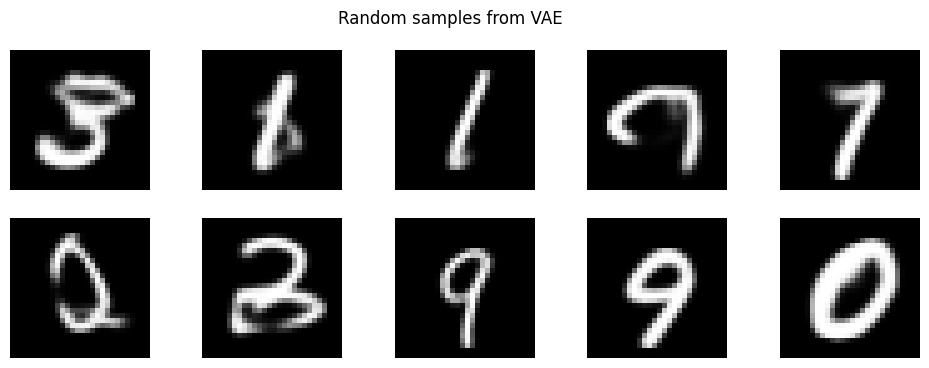

In [8]:
# Generate some random samples from the prior
z_sample = torch.randn(10, latent_dim, device=VAE.device)  # Create tensor on correct device

# Generate images from the random latent vectors
with torch.no_grad():
    x_rec = VAE.model.decode(z_sample)
    x_rec = torch.sigmoid(x_rec) # Apply sigmoid since using bernoulli VAE

# Plot the generated images
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    # Move tensor to CPU before plotting
    plt.imshow(x_rec[i].detach().cpu().reshape(28,28), cmap='gray')
    plt.axis('off')
plt.suptitle('Random samples from VAE')
plt.show()


### Load the BNN

First we import the relevant libraries and set the working directory

The cell below can be used to reload the BNN code if it has been changed

In [9]:
import importlib # Import the importlib module
import BNN

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

importlib.reload(BNN.models)  # Contains MLP
importlib.reload(BNN.wrapper) # Contains BNN_cat
importlib.reload(BNN.train)  # Contains train_BNN_classification

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

Next we load the BNN model

In [10]:
%matplotlib inline

input_dim = 784
width = 1200
depth = 2
output_dim = 10
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = 60000

lr = 1e-2

N_saves = 300
# N_saves = 5

BNN = BNN_cat(model, N_train, lr=lr, device=device)

save_dir = '../my-saves/'
weights_path = save_dir + 'state_dicts.pt'

if os.path.exists(weights_path):
    BNN.load_weights(weights_path)
else:
    print(f"Weights file not found at: {weights_path}")



Net:
BNN categorical output
    Total params: 2.40M
Loading weight samples from ../my-saves/state_dicts.pt
File size: 2741.68 MB
Loaded object type: <class 'list'>
Number of weight samples: 300


### Load the original BNN

First we import the relevant libraries and set the working directory

The cell below can be used to reload the BNN code if it has been changed

In [ ]:
import importlib # Import the importlib module
import BNN

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

importlib.reload(BNN.models)  # Contains MLP
importlib.reload(BNN.wrapper) # Contains BNN_cat
importlib.reload(BNN.train)  # Contains train_BNN_classification

from BNN.models import MLP
from BNN.wrapper import BNN_cat
from BNN.train import train_BNN_classification

Next we load the BNN model

In [ ]:
%matplotlib inline

input_dim = 784
width = 1200
depth = 2
output_dim = 10
model = MLP(input_dim, width, depth, output_dim, flatten_image=False)

N_train = 60000

lr = 1e-2

N_saves = 300
# N_saves = 5

BNN = BNN_cat(model, N_train, lr=lr, device=device)

save_dir = '../original_saves/'
weights_path = save_dir + 'original_state_dicts.pkl'

if os.path.exists(weights_path):
    BNN.load_weights(weights_path)
else:
    print(f"Weights file not found at: {weights_path}")


### Load the LBNN

In [ ]:
import importlib
import newStuff.BNN.laplaceBNN
importlib.reload(newStuff.BNN.laplaceBNN)
from newStuff.BNN.laplaceBNN import BayesianMLP, Laplace, MLP

# Print contents of BNN models directory
import os
print("Contents of ../newStuff/BNN/models/:")
if os.path.exists('../newStuff/BNN/models'):
    print('\n'.join(os.listdir('../newStuff/BNN/models')))
else:
    print("Directory does not exist")


# Load Bayesian MLP and Laplace
base_model = MLP(device=device) # Create base model first
base_model.load_state_dict(torch.load('../newStuff/BNN/models/bayes_mlp.bin'))
bayes_mlp2 = BayesianMLP(base_model) # Initialize with base model
bayes_mlp2.la = Laplace(base_model, 'classification',
                        subset_of_weights='last_layer', 
                        hessian_structure='kron')
bayes_mlp2.la.load_state_dict(torch.load('../newStuff/BNN/models/laplace.bin'))

In [71]:
BNN = base_model

### Load the datasets



In [13]:

transform_train = transforms.Compose([
    transforms.ToTensor(),
    #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    #     transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

batch_size = 1024

trainset = datasets.MNIST(root='../data', train=True, download=True, transform=transform_train)
valset = datasets.MNIST(root='../data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=device == 'cuda', num_workers=3)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, pin_memory=device == 'cuda', num_workers=3)

In [14]:
import numpy as np
from importlib import reload
import interpret.visualization_tools
reload(interpret.visualization_tools)
from interpret.visualization_tools import latent_project_MNIST


torch.cuda.empty_cache()

# tr_aleatoric_vec, tr_epistemic_vec, z_train, x_train, y_train = \
#     latent_project_MNIST(BNN, VAE, dset=trainset, batch_size=1024, cuda=cuda, flatten_BNN=True, flatten_VAE=False)

te_aleatoric_vec, te_epistemic_vec, z_test, x_test, y_test = \
    latent_project_MNIST(BNN, VAE, dset=valset, batch_size=256, flatten_BNN=True, flatten_VAE=False, prob_BNN=True)

torch.cuda.empty_cache()

te_uncertainty_vec = te_aleatoric_vec + te_epistemic_vec

uncert_idxs_sorted = np.flipud(np.argsort(te_aleatoric_vec + te_epistemic_vec))


prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out.requires_grad:  False
prob_out

In [15]:
def visualize_latent_points(VAE, z_test, num_points=10, figsize=(15,6)):
    """
    Visualize reconstructions from the first few latent points.

    Args:
        VAE: The trained VAE model
        z_test: Numpy array or Tensor of latent points to visualize
        num_points: Number of points to visualize (default=10)
        figsize: Size of the figure (default=(15,6))
    """
    # Ensure we don't try to show more points than we have
    num_points = min(num_points, z_test.shape[0])

    # Calculate grid dimensions
    num_rows = (num_points - 1) // 5 + 1  # 5 images per row
    num_cols = min(5, num_points)  # Maximum of 5 columns

    # Convert numpy array to torch tensor if necessary
    if isinstance(z_test, np.ndarray):
        z_test = torch.from_numpy(z_test).float()

    # Generate images from the latent vectors
    with torch.no_grad():
        x_rec = VAE.model.decode(z_test[:num_points].to(VAE.device))
        x_rec = torch.sigmoid(x_rec)  # Apply sigmoid since using bernoulli VAE

    # Plot the generated images
    plt.figure(figsize=figsize)
    for i in range(num_points):
        plt.subplot(num_rows, num_cols, i+1)
        # Move tensor to CPU before plotting
        plt.imshow(x_rec[i].detach().cpu().reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.suptitle('Reconstructions from test latent points')
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_latent_points(VAE, z_test, num_points=20)

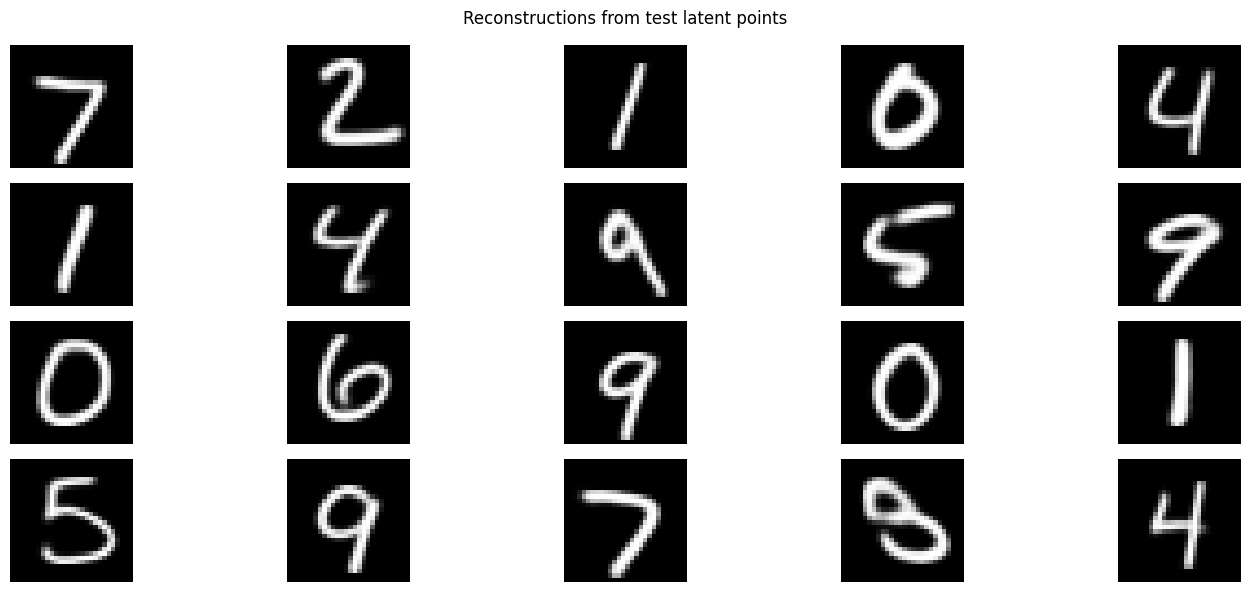

In [16]:
visualize_latent_points(VAE, z_test, num_points=20)

Text(0, 0.5, 'Uncertainty')

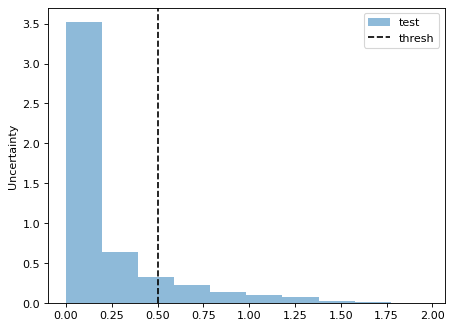

In [17]:
import matplotlib.pyplot as plt

H_thresh_MNIST = 0.5

plt.figure(dpi=80)
plt.hist(te_uncertainty_vec, density=True, alpha=0.5, label='test')
plt.axvline(x=H_thresh_MNIST, color='k', linestyle='--', label='thresh')
plt.legend()
plt.ylabel('Uncertainty')

In [18]:
Nbatch = 40
z_init_batch = z_test[uncert_idxs_sorted[:Nbatch]]
x_init_batch = x_test[uncert_idxs_sorted[:Nbatch]]
y_init_batch = y_test[uncert_idxs_sorted[:Nbatch]]

## Test calibration of BNN


In [11]:
from sklearn.calibration import calibration_curve

def plot_reliability_diagram(y_true, pred_classes, max_probs, n_bins=10, model_name='BNN', ax=None):
    """
    Plot reliability diagram for multiclass classification
    y_true: true labels
    pred_classes: predicted classes
    max_probs: confidence scores (maximum probability)
    ax: matplotlib axes to plot on
    """
    if ax is None:
        ax = plt.gca()

    # Convert y_true to 0 and 1 for binary classification
    y_true_binary = (y_true == pred_classes).astype(int)

    prob_true, prob_pred = calibration_curve(y_true_binary,
                                           max_probs,
                                           n_bins=n_bins,
                                           strategy='uniform')

    ax.plot(prob_pred, prob_true, marker='o', label=model_name)
    ax.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Observed Frequency')
    ax.set_title('Reliability Diagram')
    ax.legend()

prob_out.requires_grad:  False


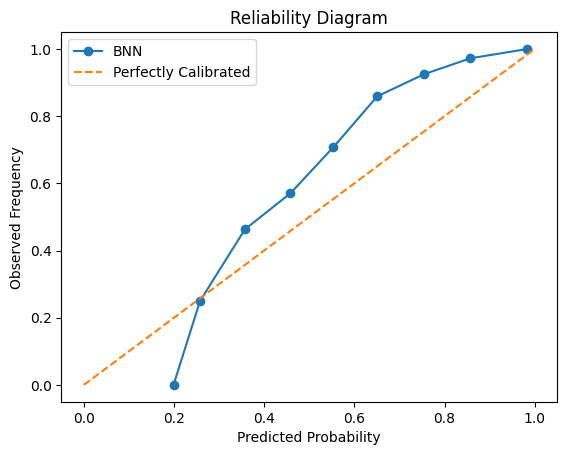

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from src.utils import MNIST_mean_std_norm

# Get BNN predictions on test set
x_test_processed = MNIST_mean_std_norm(torch.tensor(x_test).reshape(x_test.shape[0], -1))
# Move tensor to the same device as BNN
x_test_processed = x_test_processed.to(BNN.device)
# Use sample_predict instead of direct call
probs = BNN.sample_predict(x_test_processed, Nsamples=0, grad=False)

# For multiclass case, we'll use the maximum probability as confidence
max_probs_BNN = probs.mean(dim=0).max(dim=1)[0].detach().cpu().numpy()
pred_classes = probs.mean(dim=0).argmax(dim=1).detach().cpu().numpy()

# Plot calibration curve
plot_reliability_diagram(y_test, pred_classes, max_probs_BNN)

Epoch 1, Loss: 0.2526, Test Accuracy: 98.47%
Epoch 2, Loss: 0.0622, Test Accuracy: 98.93%
Epoch 3, Loss: 0.0442, Test Accuracy: 99.12%
Epoch 4, Loss: 0.0346, Test Accuracy: 99.22%
Epoch 5, Loss: 0.0291, Test Accuracy: 99.30%
Epoch 6, Loss: 0.0279, Test Accuracy: 99.33%
Epoch 7, Loss: 0.0230, Test Accuracy: 99.27%
Epoch 8, Loss: 0.0201, Test Accuracy: 99.26%
Epoch 9, Loss: 0.0186, Test Accuracy: 99.34%
Epoch 10, Loss: 0.0156, Test Accuracy: 99.35%


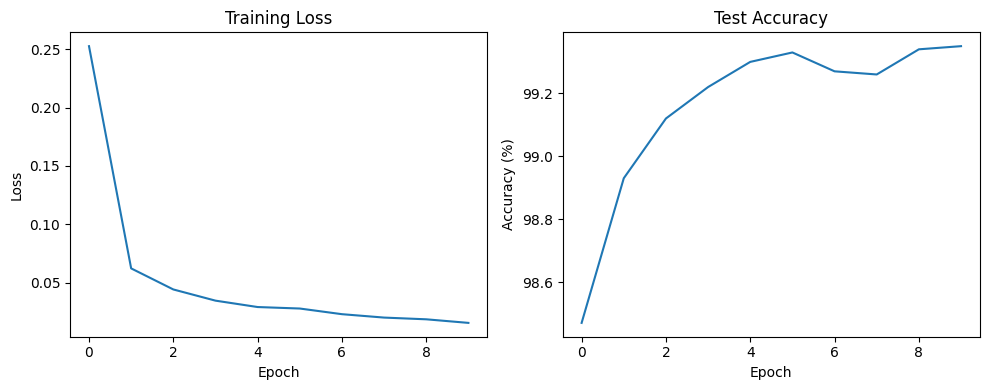

In [20]:
# Train a regular CNN for comparison
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Match BNN_cat architecture
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # 28x28 -> 28x28
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)  # 28x28 -> 28x28
        self.pool1 = nn.MaxPool2d(2, 2)  # 28x28 -> 14x14

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 14x14 -> 14x14
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)  # 14x14 -> 14x14
        self.pool2 = nn.MaxPool2d(2, 2)  # 14x14 -> 7x7

        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # Reshape to [batch, channels, height, width]

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout(x)

        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize model and move to same device as BNN
cnn = SimpleCNN().to(BNN.device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(cnn.parameters())

# Training loop
n_epochs = 10
batch_size = 128

# Create DataLoaders with num_workers=0 to avoid multiprocessing issues
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        shuffle=True, num_workers=0)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                      shuffle=False, num_workers=0)

# Train using the DataLoader
train_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    cnn.train()
    running_loss = 0.0

    # Train on batches from trainloader
    for batch_x, batch_y in trainloader:
        batch_x = batch_x.to(BNN.device)
        batch_y = batch_y.to(BNN.device)

        optimizer.zero_grad()
        outputs = cnn(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Evaluate on validation set
    cnn.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_x, batch_y in valloader:
            batch_x = batch_x.to(BNN.device)
            batch_y = batch_y.to(BNN.device)
            outputs = cnn(batch_x)
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    accuracy = 100 * correct / total
    train_losses.append(running_loss/len(trainloader))
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}, Test Accuracy: {accuracy:.2f}%')

# Plot training curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

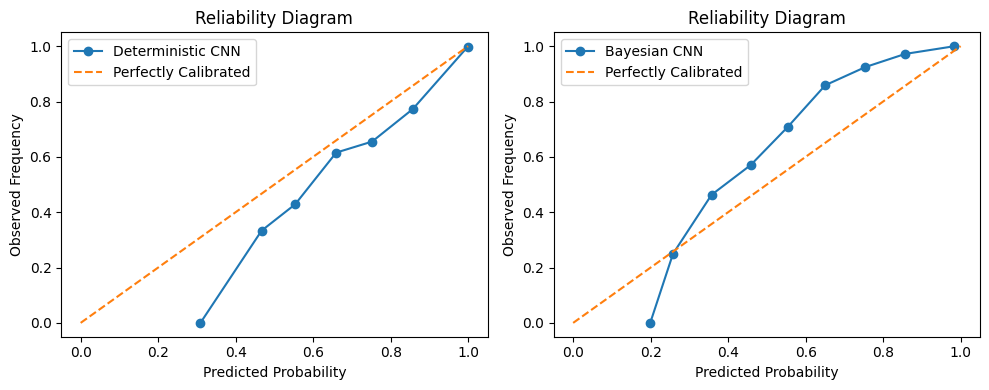

In [21]:
# Get predictions and confidence scores from trained CNN
cnn.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for batch_x, batch_y in valloader:
        batch_x = batch_x.to(BNN.device)
        outputs = cnn(batch_x)
        probs = F.softmax(outputs, dim=1)
        max_probs, predicted = torch.max(probs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(max_probs.cpu().numpy())
        all_labels.extend(batch_y.numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot on the first subplot
plot_reliability_diagram(all_labels, all_preds, all_probs, n_bins=10,
                        model_name='Deterministic CNN', ax=ax1)

# Plot on the second subplot
plot_reliability_diagram(y_test, pred_classes, max_probs_BNN,
                        model_name='Bayesian CNN', ax=ax2)

plt.tight_layout()
plt.show()


### Load regular NN


## Old code for CLUE


In [ ]:
print(x_init_batch.shape)

In [ ]:
from interpret.CLUE import CLUE
import importlib
import interpret.CLUE
importlib.reload(interpret.CLUE)
from interpret.CLUE import CLUE

from src.utils import Ln_distance

# batch_size = 10

torch.cuda.empty_cache()

dist = Ln_distance(n=1, dim=(1))
x_dim = x_init_batch.reshape(x_init_batch.shape[0], -1).shape[1]
distance_weight = 25 / x_dim



# z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, dist_vec, cost_vec = \
# CLUE.batch_optimise(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
#                       prior_weight=0, distance_weight=distance_weight,
#                  latent_L2_weight=0, prediction_similarity_weight=0,
#                  lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
#                       flatten_BNN=True,
#                  regression=False, cuda=True, batch_size=batch_size, min_steps=3, max_steps=25, n_early_stop=3)


CLUE_explainer = CLUE(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
                      prior_weight=0, distance_weight=distance_weight,
                 latent_L2_weight=0, prediction_similarity_weight=0,
                 lr=1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
                      flatten_BNN=True,
                 regression=False, cuda=False)

torch.autograd.set_detect_anomaly(False)

# clue_instance.optimizer = SGD(self.trainable_params, lr=lr, momentum=0.5, nesterov=True)
z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, cost_vec, dist_vec = CLUE_explainer.optimise(
    min_steps=3, max_steps=20, n_early_stop=3 )

fig, axes = plt.subplots(1, 3, dpi=130)
axes[0].plot(cost_vec.mean(axis=1))
axes[0].set_title('mean Cost')
axes[0].set_xlabel('iterations')

axes[1].plot(uncertainty_vec.mean(axis=1))
axes[1].set_title('mean Total Entropy')
axes[1].set_xlabel('iterations')

axes[2].plot(dist_vec.mean(axis=1))
axes[2].set_title('mean Ln Cost')
axes[2].set_xlabel('iterations')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

In [ ]:
# Verify device placement
print(f"BNN device: {BNN.device}")
print(f"VAE device: {VAE.device}")

# Test CLUE
### Run CLUE


In [43]:
import importlib
import interpret.CLUE
importlib.reload(interpret.CLUE)
from interpret.CLUE import CLUE
from src.utils import Ln_distance

# batch_size = 10

torch.cuda.empty_cache()

dist = Ln_distance(n=1, dim=(1))
x_dim = x_init_batch.reshape(x_init_batch.shape[0], -1).shape[1]
distance_weight = 25 / x_dim


# z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, dist_vec, cost_vec = \
# CLUE.batch_optimise(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
#                       prior_weight=0, distance_weight=distance_weight,
#                  latent_L2_weight=0, prediction_similarity_weight=0,
#                  lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
#                       flatten_BNN=True,
#                  regression=False, cuda=True, batch_size=batch_size, min_steps=3, max_steps=25, n_early_stop=3)

# Convert input tensors to device
# x_init_batch = x_init_batch.to(device)
# z_init_batch = z_init_batch.to(device) if z_init_batch is not None else None


CLUE_explainer = CLUE(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
                      prior_weight=0, distance_weight=distance_weight,
                 latent_L2_weight=0, prediction_similarity_weight=0,
                 lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
                      flatten_BNN=True,
                 regression=False, prob_BNN=False, cuda=False)



self.z.requires_grad:  True


In [45]:
import importlib
import interpret.CLUE
importlib.reload(interpret.CLUE)
from interpret.CLUE import CLUE
from src.utils import Ln_distance

# batch_size = 10

torch.cuda.empty_cache()

dist = Ln_distance(n=1, dim=(1))
x_dim = x_init_batch.reshape(x_init_batch.shape[0], -1).shape[1]
distance_weight = 25 / x_dim


# z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, dist_vec, cost_vec = \
# CLUE.batch_optimise(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
#                       prior_weight=0, distance_weight=distance_weight,
#                  latent_L2_weight=0, prediction_similarity_weight=0,
#                  lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
#                       flatten_BNN=True,
#                  regression=False, cuda=True, batch_size=batch_size, min_steps=3, max_steps=25, n_early_stop=3)

# Convert input tensors to device
# x_init_batch = x_init_batch.to(device)
# z_init_batch = z_init_batch.to(device) if z_init_batch is not None else None


CLUE_explainer = CLUE(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
                      prior_weight=0, distance_weight=distance_weight,
                 latent_L2_weight=0, prediction_similarity_weight=0,
                 lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
                      flatten_BNN=True,
                 regression=False, cuda=False)

CLUE_explainer.simple_optimise(5)

self.z.requires_grad:  True
Step 0, Loss: 28.720338821411133, z: tensor([[ 9.4122e-02, -1.3567e+00,  1.5211e+00, -4.4818e-01, -9.0129e-01,
          7.1007e-02,  9.5277e-02, -5.3753e-01,  1.8897e+00, -5.3100e-01,
         -1.0030e-01, -7.1949e-01, -6.4235e-01,  3.7301e-01, -2.1065e+00,
         -3.4665e-01, -4.5819e-01,  1.4626e+00, -8.8916e-02, -1.6998e+00],
        [ 8.8618e-02, -1.8540e+00,  1.0313e+00,  6.8281e-01, -7.1711e-01,
          7.8545e-01, -4.0786e-02,  4.8094e-01,  1.2242e+00,  1.3988e+00,
         -5.3495e-01,  1.4153e+00,  3.3936e-01, -1.9835e+00, -2.2218e-01,
          4.3814e-01,  4.4287e-01, -1.8963e+00, -7.2026e-01,  5.1405e-02],
        [ 9.2020e-02, -1.1392e+00,  1.0661e+00,  1.2502e+00, -8.1692e-02,
         -2.9141e-02,  1.7315e+00,  5.9439e-01, -1.3427e+00,  1.0650e+00,
         -2.2244e-01,  1.7286e+00, -1.6481e+00, -8.5278e-01,  8.9647e-01,
          1.0003e+00,  9.2023e-01, -6.2238e-01,  6.8863e-01,  5.9948e-01],
        [ 8.4964e-02, -4.2456e-01,  4.9223e-

self.z.requires_grad:  True
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 0: z.grad.norm = 72.38910675048828
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 1: z.grad.norm = 71.56694793701172
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 2: z.grad.norm = 70.9772720336914
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 3: z.grad.norm = 71.86217498779297
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 4: z.grad.norm = 71.72222900390625
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 5: z.grad.norm = 71.29362487792969
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 6: z.grad.norm = 70.09339904785156
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 7: z.grad.norm = 69.1181411743164
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 8: z.grad.norm = 66.5716552734375
toBNN.requires_grad:  True
probs.requires_grad:  True
Step 9: z.grad.norm = 65.38513946533203
toBNN.requires_grad:  True
probs.re

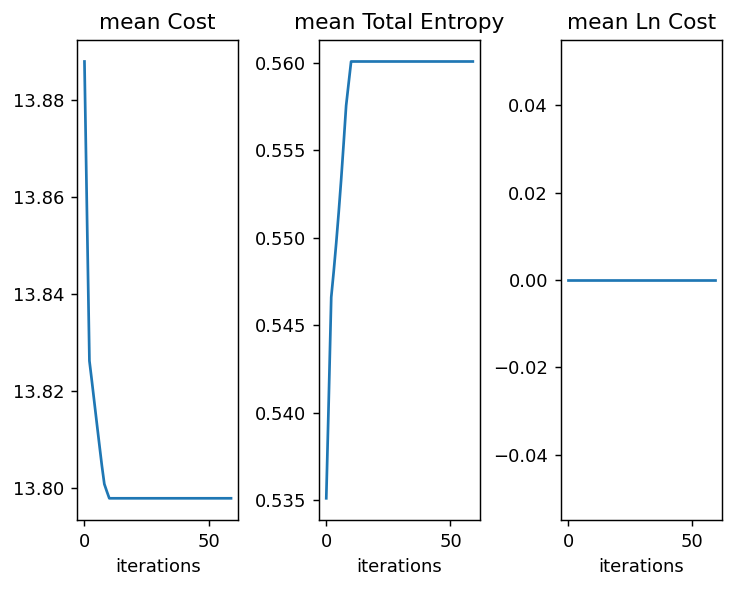

In [68]:
import importlib
import interpret.CLUE
importlib.reload(interpret.CLUE)
from interpret.CLUE import CLUE
from src.utils import Ln_distance

# batch_size = 10

torch.cuda.empty_cache()

dist = Ln_distance(n=1, dim=(1))
x_dim = x_init_batch.reshape(x_init_batch.shape[0], -1).shape[1]
distance_weight = 200 / x_dim


# z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, dist_vec, cost_vec = \
# CLUE.batch_optimise(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
#                       prior_weight=0, distance_weight=distance_weight,
#                  latent_L2_weight=0, prediction_similarity_weight=0,
#                  lr=1e-1,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
#                       flatten_BNN=True,
#                  regression=False, cuda=True, batch_size=batch_size, min_steps=3, max_steps=25, n_early_stop=3)

# Convert input tensors to device
# x_init_batch = x_init_batch.to(device)
# z_init_batch = z_init_batch.to(device) if z_init_batch is not None else None

torch.autograd.set_detect_anomaly(True)


CLUE_explainer = CLUE(VAE, BNN, x_init_batch, uncertainty_weight=1, aleatoric_weight=0, epistemic_weight=0,
                      prior_weight=0, distance_weight=distance_weight,
                 latent_L2_weight=0, prediction_similarity_weight=0,
                 lr=1e-3,  cond_mask=None, distance_metric=dist, z_init=z_init_batch, norm_MNIST=True,
                      flatten_BNN=True,
                 regression=False, prob_BNN=True, cuda=False)

# clue_instance.optimizer = SGD(self.trainable_params, lr=lr, momentum=0.5, nesterov=True)
z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, cost_vec, dist_vec = CLUE_explainer.optimise(
     min_steps=3, max_steps=60, n_early_stop=3)

fig, axes = plt.subplots(1, 3, dpi=130)
axes[0].plot(cost_vec.mean(axis=1))
axes[0].set_title('mean Cost')
axes[0].set_xlabel('iterations')

axes[1].plot(uncertainty_vec.mean(axis=1))
axes[1].set_title('mean Total Entropy')
axes[1].set_xlabel('iterations')

axes[2].plot(dist_vec.mean(axis=1))
axes[2].set_title('mean Ln Cost')
axes[2].set_xlabel('iterations')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


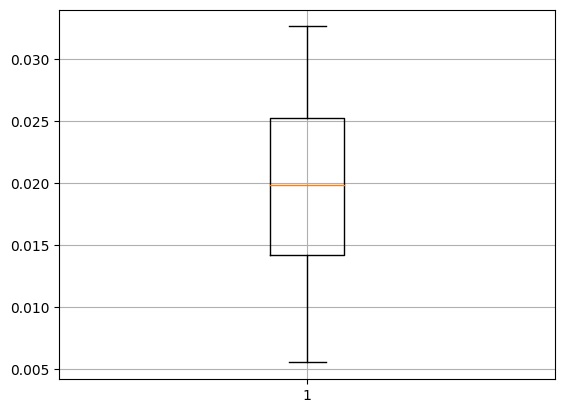

In [59]:
delta_x = np.abs(x_init_batch - x_vec[-1]).sum(axis=(1,2,3))
delta_H = te_uncertainty_vec[uncert_idxs_sorted[:Nbatch]] - uncertainty_vec[-1]

ratio = delta_H / delta_x


plt.figure(dpi=100)
plt.boxplot([ratio])
plt.grid()
ax = plt.gca()


### Visualise CLUEs

prob_out.requires_grad:  False
original aleatoric: 1.567 epistemic 0.401
Original prediction: class 1 with probability 0.241


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.786 epistemic 0.166
Modified prediction: class 1 with probability 0.717
0


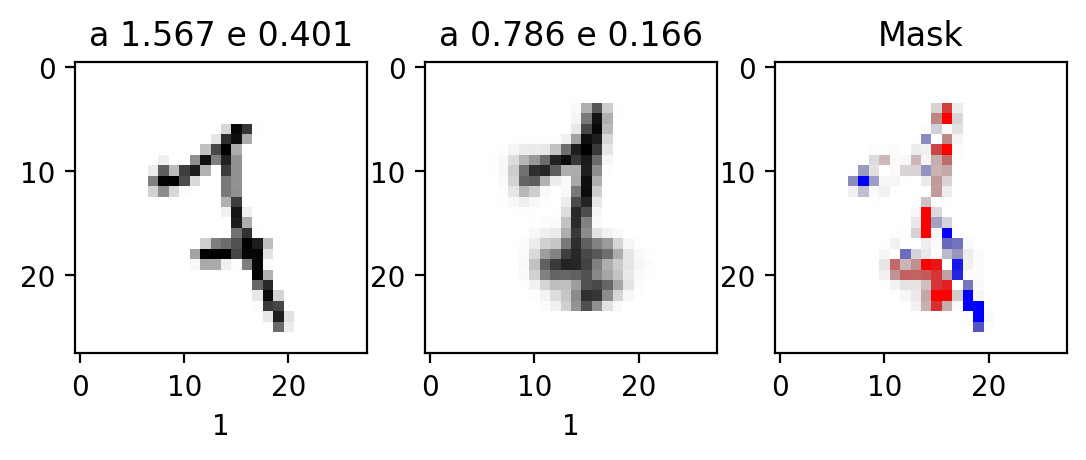

prob_out.requires_grad:  False
original aleatoric: 1.422 epistemic 0.484
Original prediction: class 2 with probability 0.199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.801 epistemic 0.205
Modified prediction: class 8 with probability 0.742
1


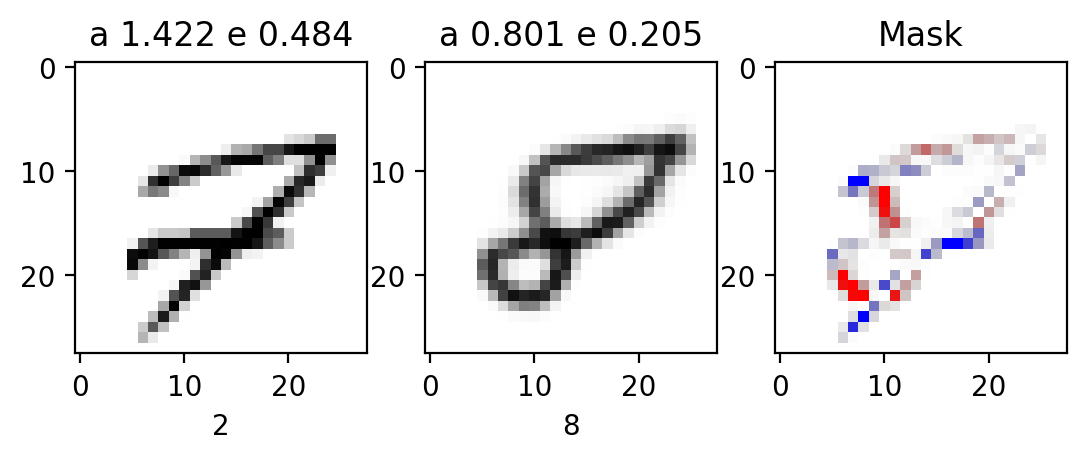

prob_out.requires_grad:  False
original aleatoric: 1.410 epistemic 0.485
Original prediction: class 5 with probability 0.323


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.413 epistemic 0.099
Modified prediction: class 8 with probability 0.892
2


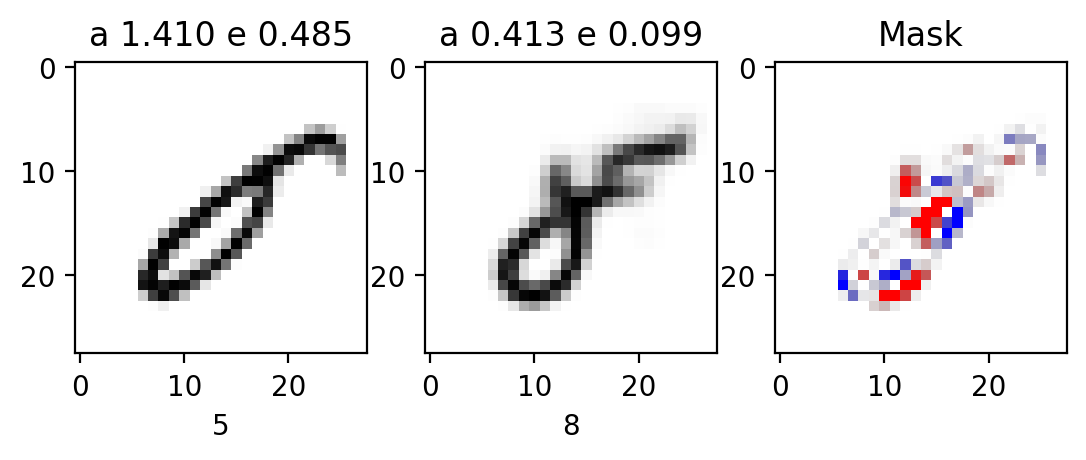

prob_out.requires_grad:  False
original aleatoric: 1.397 epistemic 0.493
Original prediction: class 2 with probability 0.375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.940 epistemic 0.256
Modified prediction: class 2 with probability 0.599
3


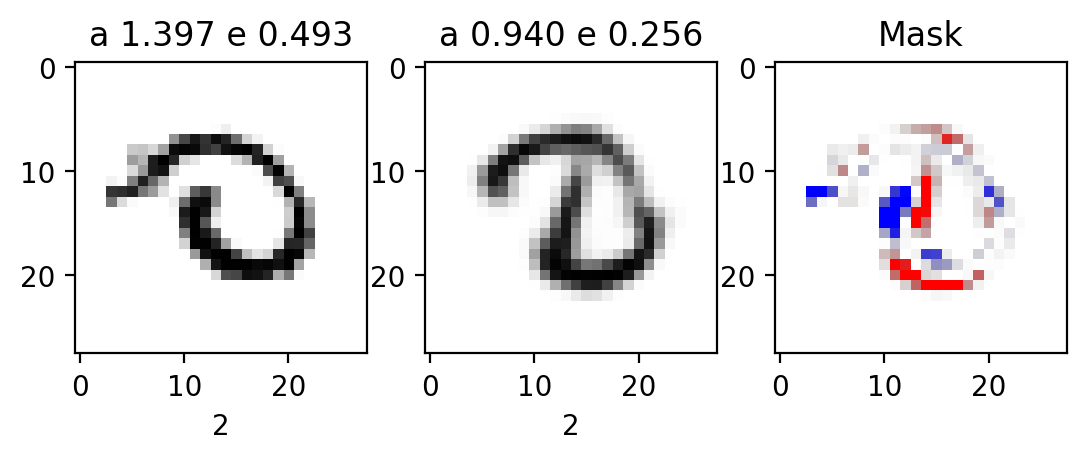

prob_out.requires_grad:  False
original aleatoric: 1.385 epistemic 0.473
Original prediction: class 4 with probability 0.254


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.581 epistemic 0.175
Modified prediction: class 2 with probability 0.823
4


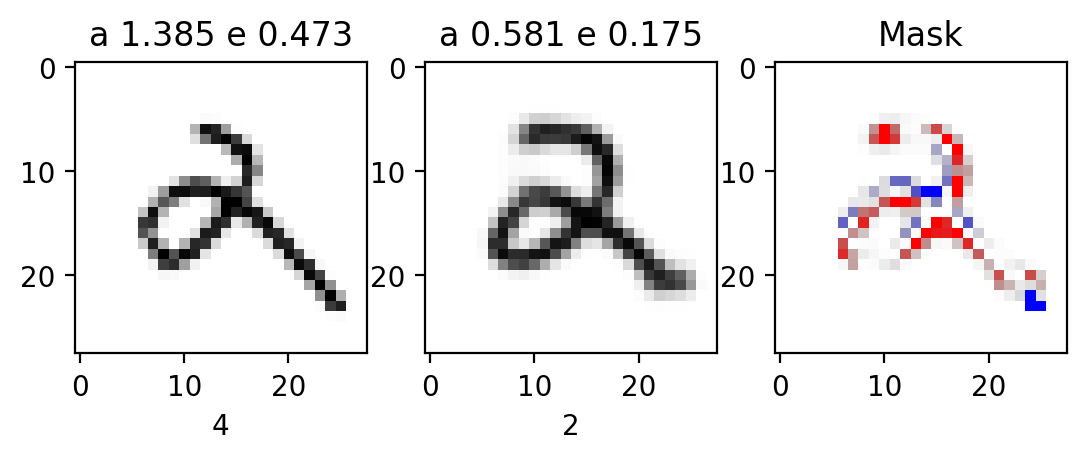

prob_out.requires_grad:  False
original aleatoric: 1.391 epistemic 0.436
Original prediction: class 9 with probability 0.225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.871 epistemic 0.209
Modified prediction: class 9 with probability 0.599
5


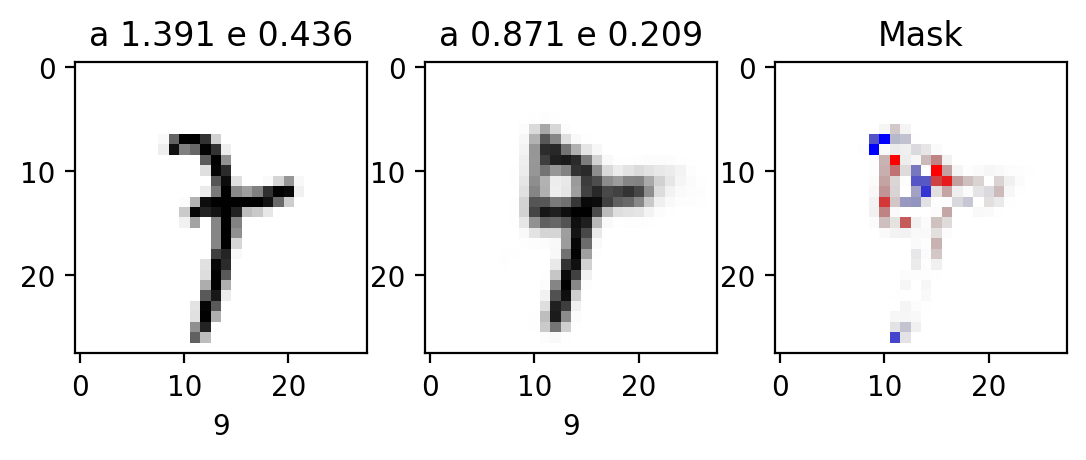

prob_out.requires_grad:  False
original aleatoric: 1.299 epistemic 0.527
Original prediction: class 3 with probability 0.356


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.764 epistemic 0.189
Modified prediction: class 8 with probability 0.767
6


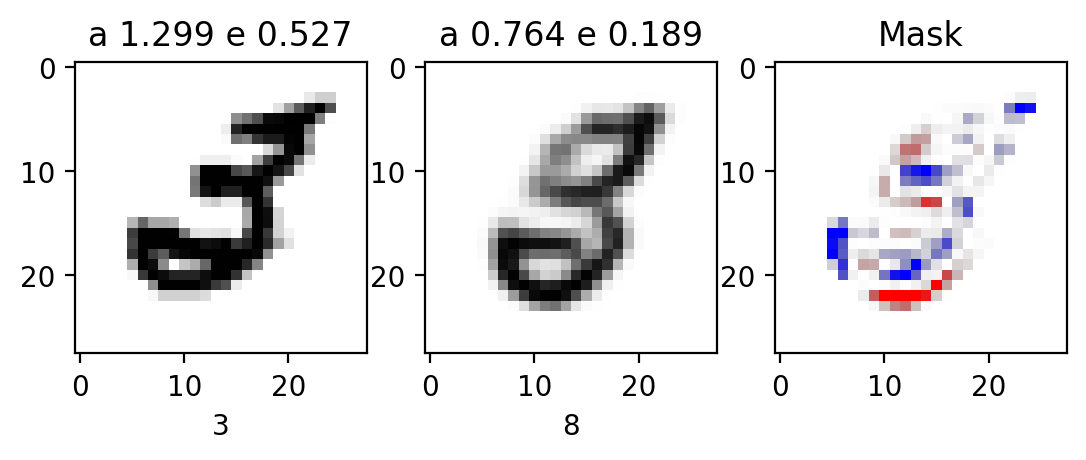

prob_out.requires_grad:  False
original aleatoric: 1.388 epistemic 0.432
Original prediction: class 0 with probability 0.235


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.183 epistemic 0.030
Modified prediction: class 0 with probability 0.966
7


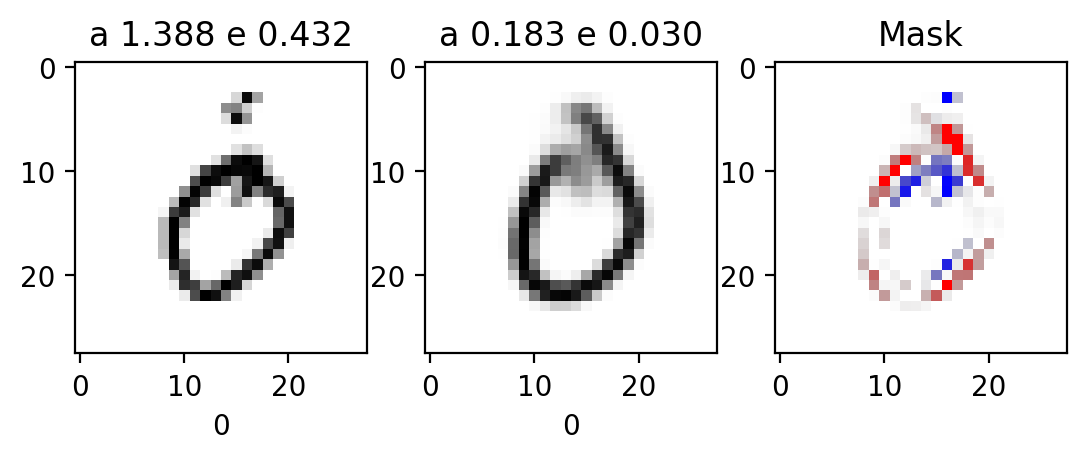

prob_out.requires_grad:  False
original aleatoric: 1.270 epistemic 0.470
Original prediction: class 8 with probability 0.378


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.223 epistemic 0.044
Modified prediction: class 8 with probability 0.952
8


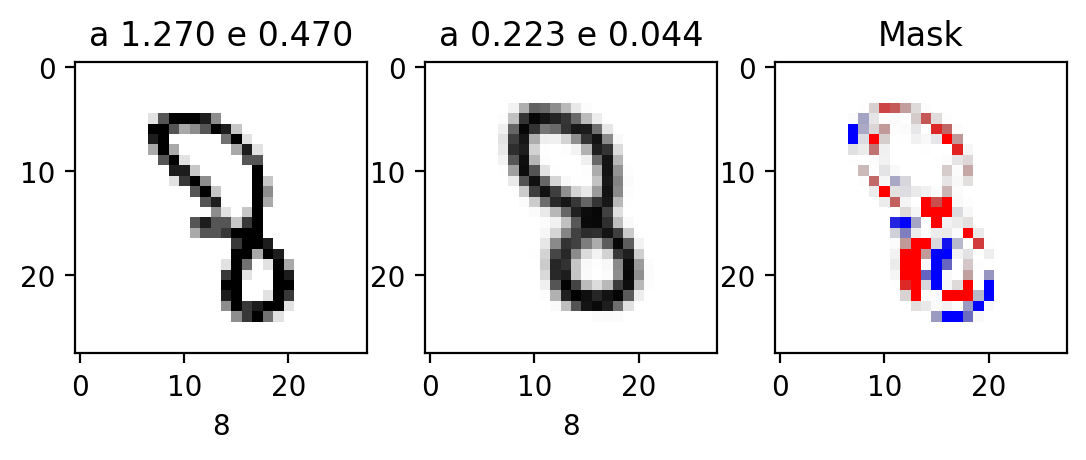

prob_out.requires_grad:  False
original aleatoric: 1.378 epistemic 0.350
Original prediction: class 9 with probability 0.379


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.375 epistemic 0.091
Modified prediction: class 9 with probability 0.899
9


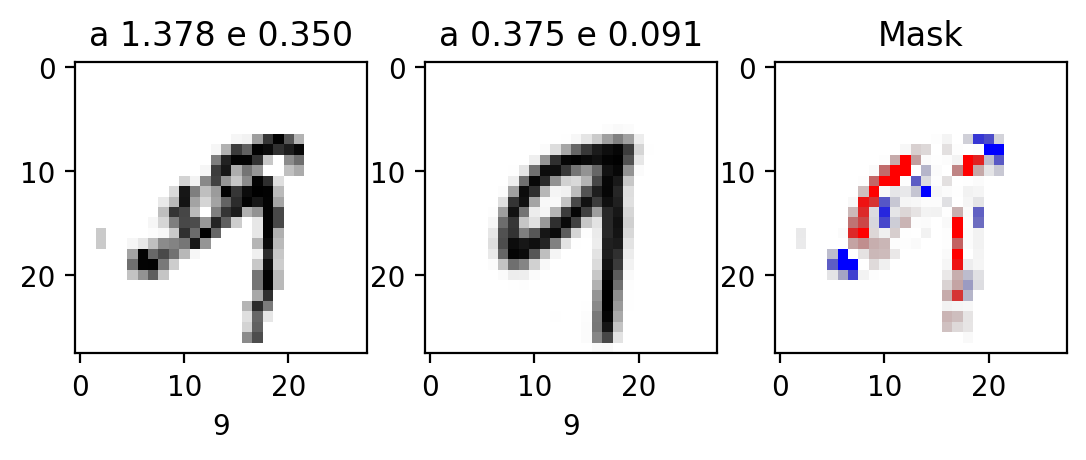

prob_out.requires_grad:  False
original aleatoric: 1.226 epistemic 0.492
Original prediction: class 8 with probability 0.241


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.439 epistemic 0.124
Modified prediction: class 8 with probability 0.873
10


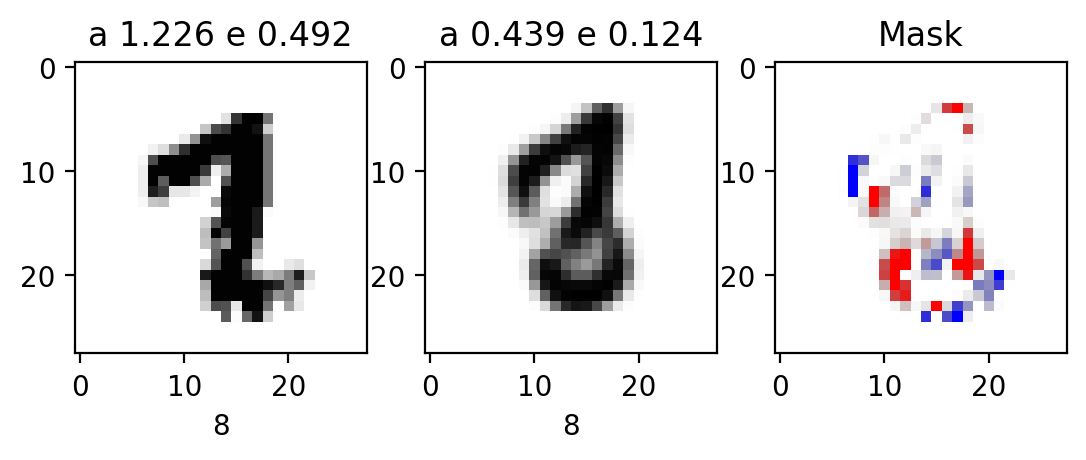

prob_out.requires_grad:  False
original aleatoric: 1.169 epistemic 0.546
Original prediction: class 0 with probability 0.385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.653 epistemic 0.153
Modified prediction: class 3 with probability 0.809
11


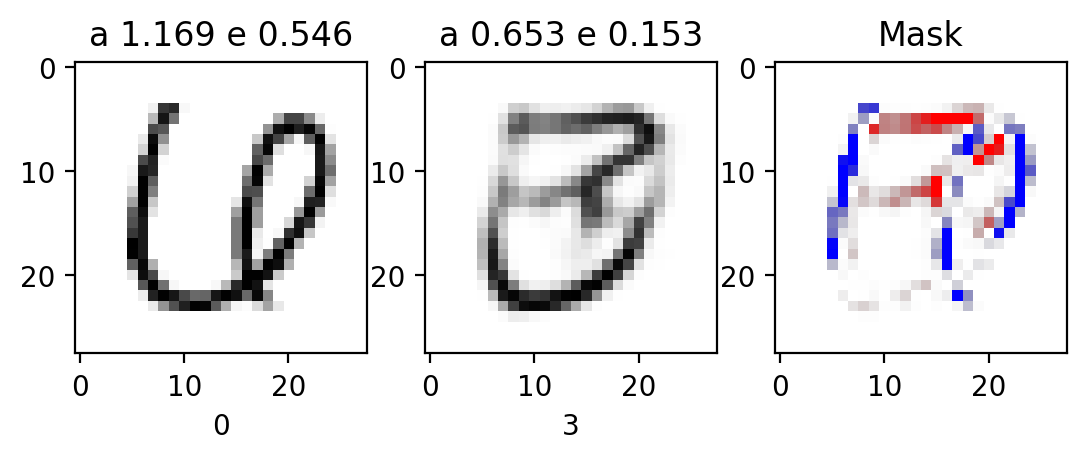

prob_out.requires_grad:  False
original aleatoric: 1.240 epistemic 0.464
Original prediction: class 8 with probability 0.404


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.247 epistemic 0.056
Modified prediction: class 8 with probability 0.948
12


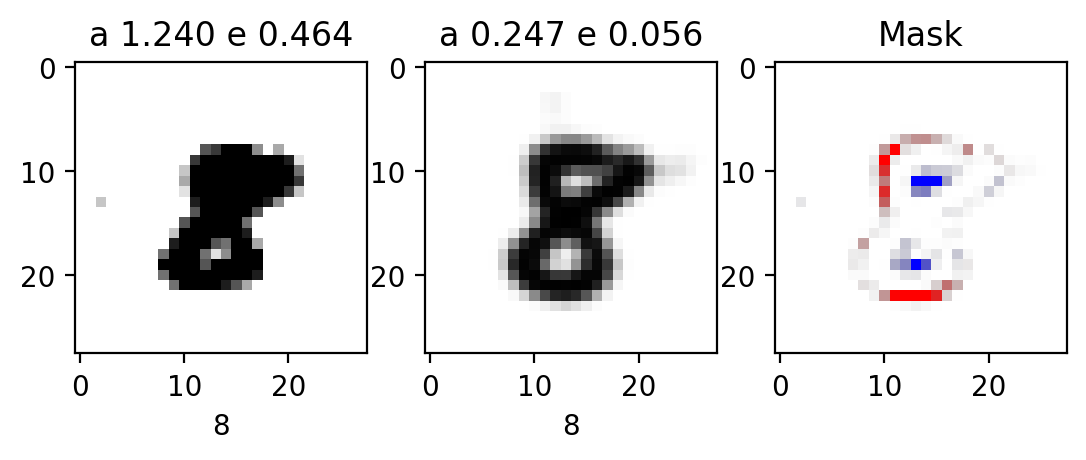

prob_out.requires_grad:  False
original aleatoric: 1.350 epistemic 0.349
Original prediction: class 2 with probability 0.355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.711 epistemic 0.157
Modified prediction: class 7 with probability 0.735
13


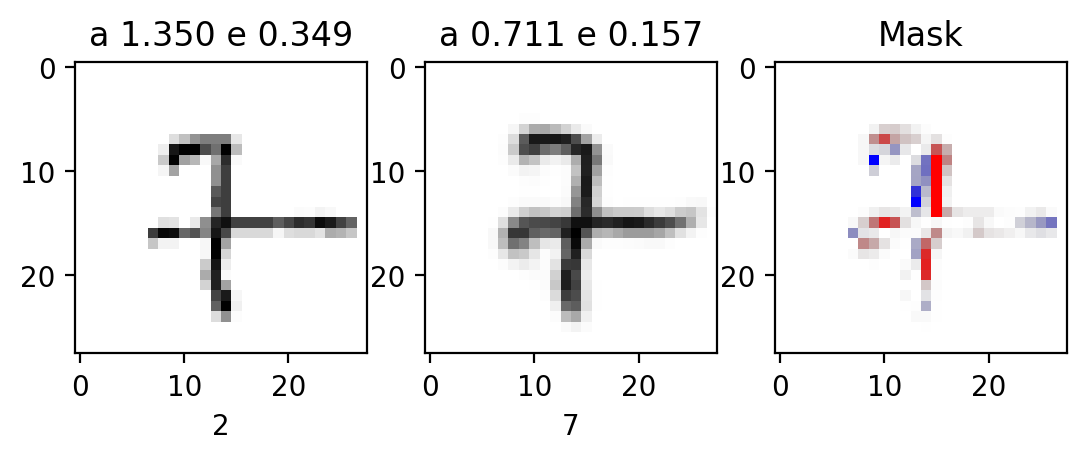

prob_out.requires_grad:  False
original aleatoric: 1.307 epistemic 0.382
Original prediction: class 4 with probability 0.319


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.281 epistemic 0.047
Modified prediction: class 8 with probability 0.940
14


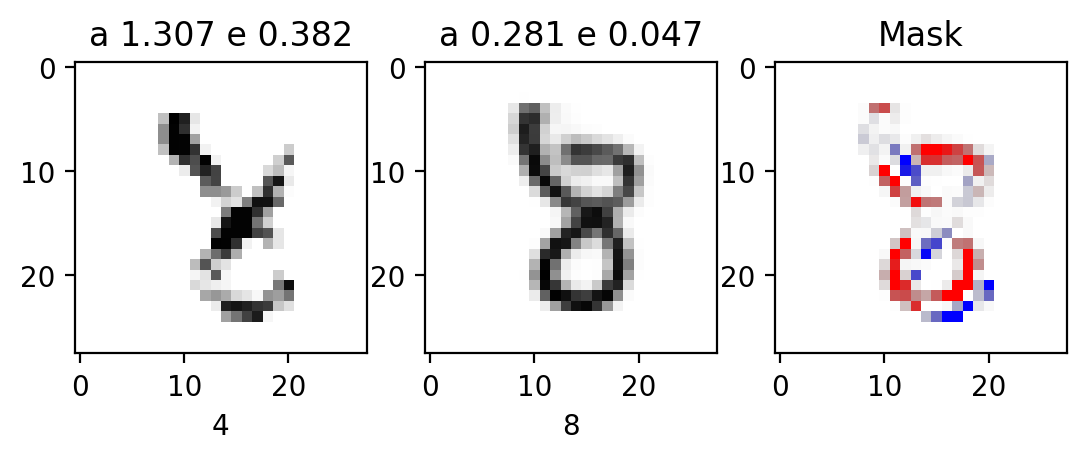

prob_out.requires_grad:  False
original aleatoric: 1.277 epistemic 0.407
Original prediction: class 9 with probability 0.316


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.205 epistemic 0.034
Modified prediction: class 8 with probability 0.958
15


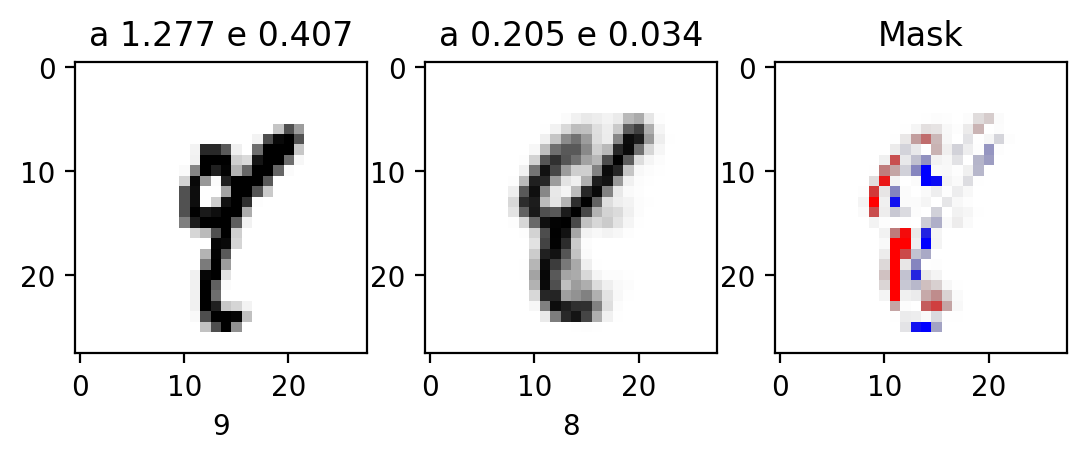

prob_out.requires_grad:  False
original aleatoric: 1.261 epistemic 0.422
Original prediction: class 7 with probability 0.357


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 1.025 epistemic 0.276
Modified prediction: class 2 with probability 0.554
16


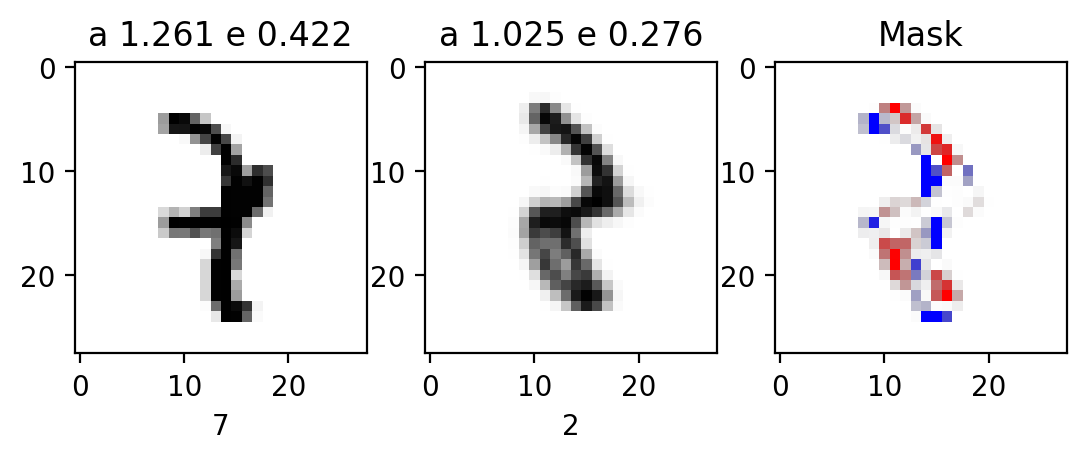

prob_out.requires_grad:  False
original aleatoric: 1.276 epistemic 0.400
Original prediction: class 8 with probability 0.438


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.539 epistemic 0.130
Modified prediction: class 8 with probability 0.852
17


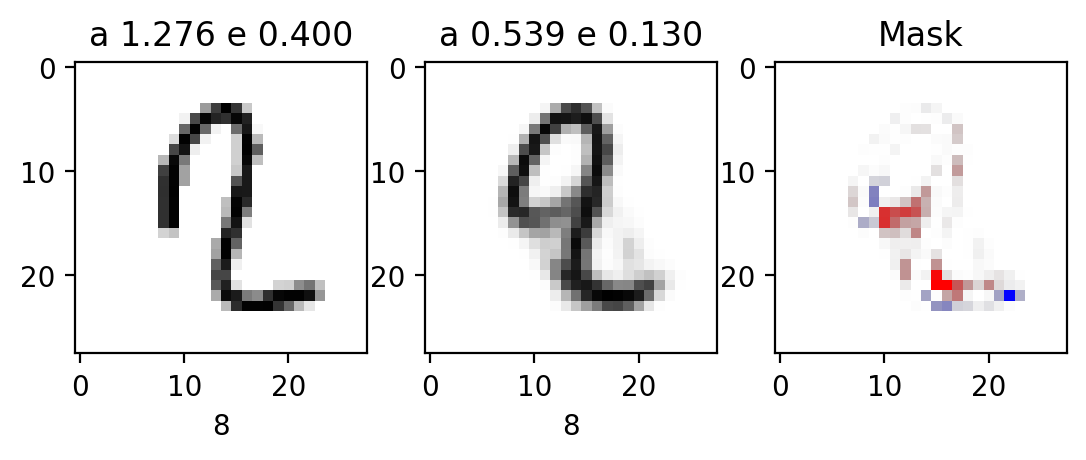

prob_out.requires_grad:  False
original aleatoric: 1.350 epistemic 0.320
Original prediction: class 3 with probability 0.324


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.568 epistemic 0.117
Modified prediction: class 5 with probability 0.830
18


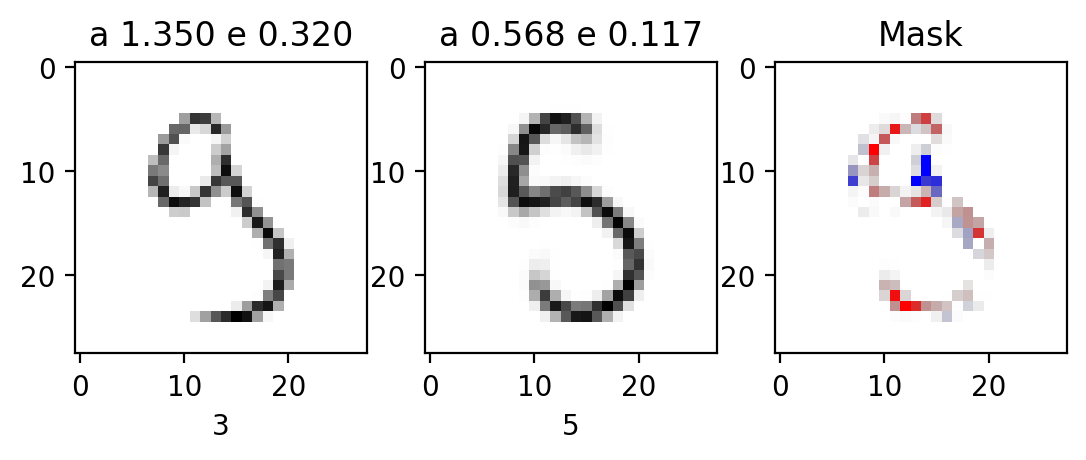

prob_out.requires_grad:  False
original aleatoric: 1.292 epistemic 0.376
Original prediction: class 3 with probability 0.280


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.127 epistemic 0.023
Modified prediction: class 8 with probability 0.975
19


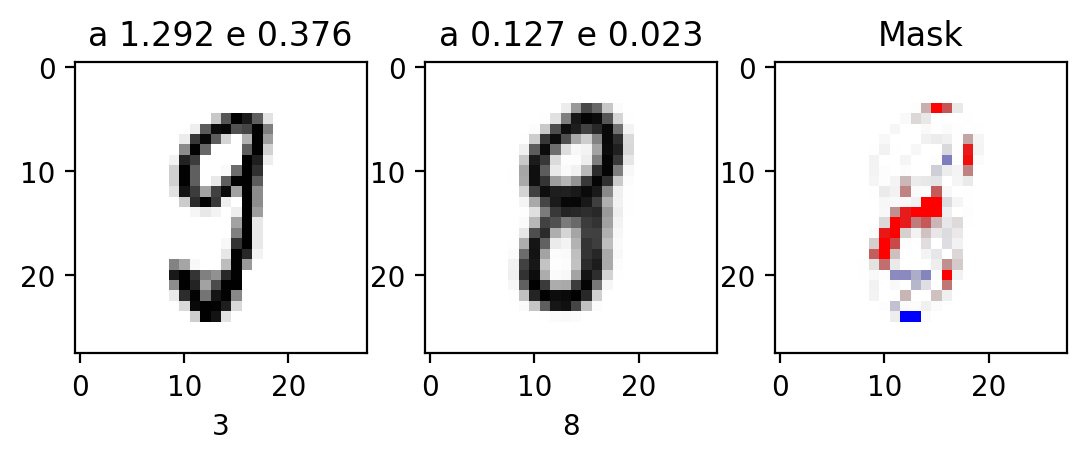

prob_out.requires_grad:  False
original aleatoric: 1.287 epistemic 0.363
Original prediction: class 5 with probability 0.366


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.294 epistemic 0.055
Modified prediction: class 8 with probability 0.937
20


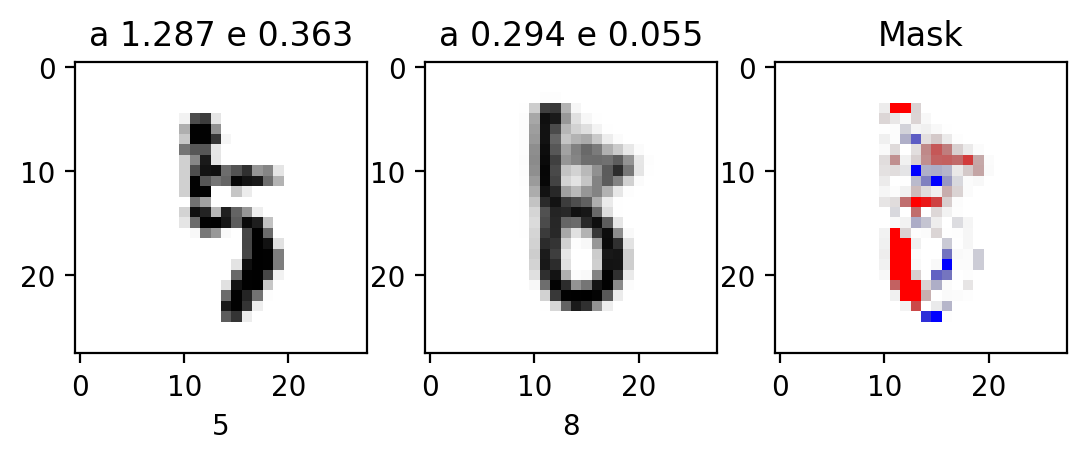

prob_out.requires_grad:  False
original aleatoric: 1.291 epistemic 0.358
Original prediction: class 1 with probability 0.315


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.313 epistemic 0.083
Modified prediction: class 4 with probability 0.918
21


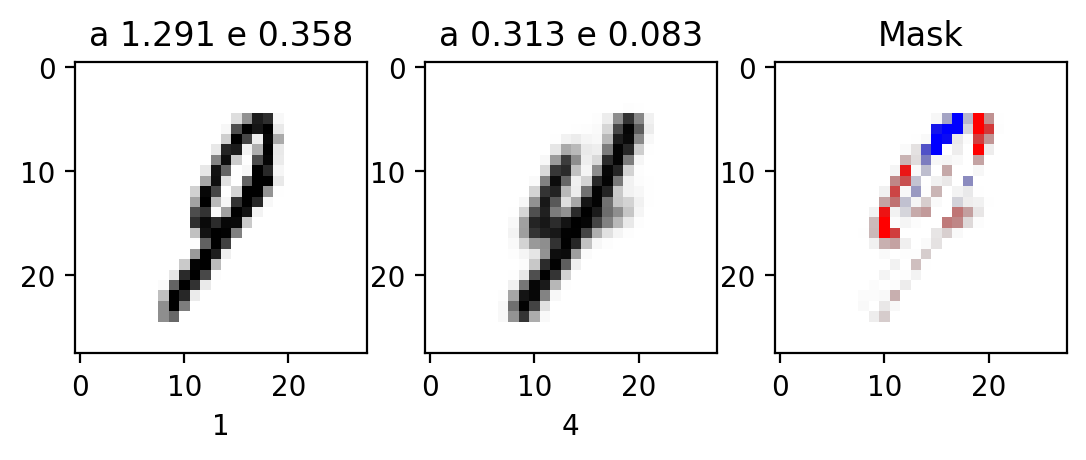

prob_out.requires_grad:  False
original aleatoric: 1.187 epistemic 0.459
Original prediction: class 9 with probability 0.332


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.619 epistemic 0.175
Modified prediction: class 6 with probability 0.765
22


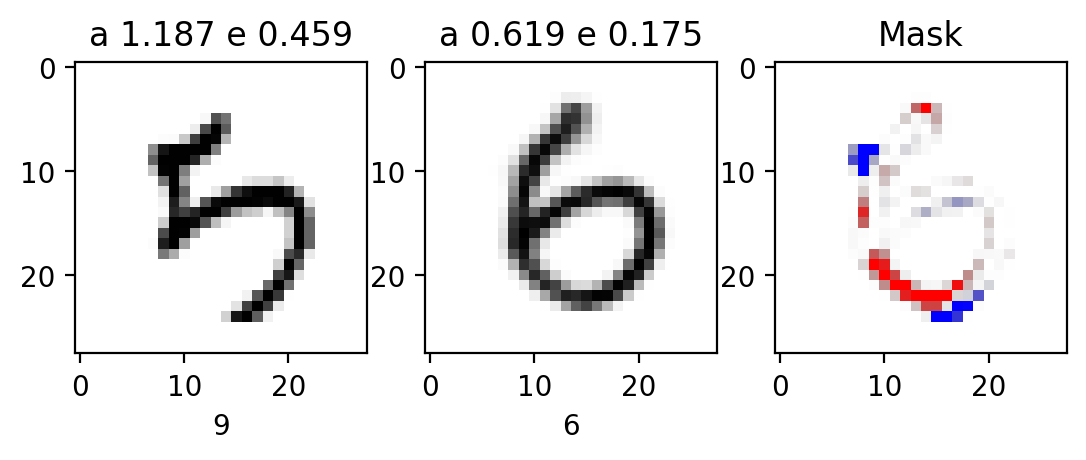

prob_out.requires_grad:  False
original aleatoric: 1.179 epistemic 0.455
Original prediction: class 4 with probability 0.327


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.243 epistemic 0.049
Modified prediction: class 0 with probability 0.940
23


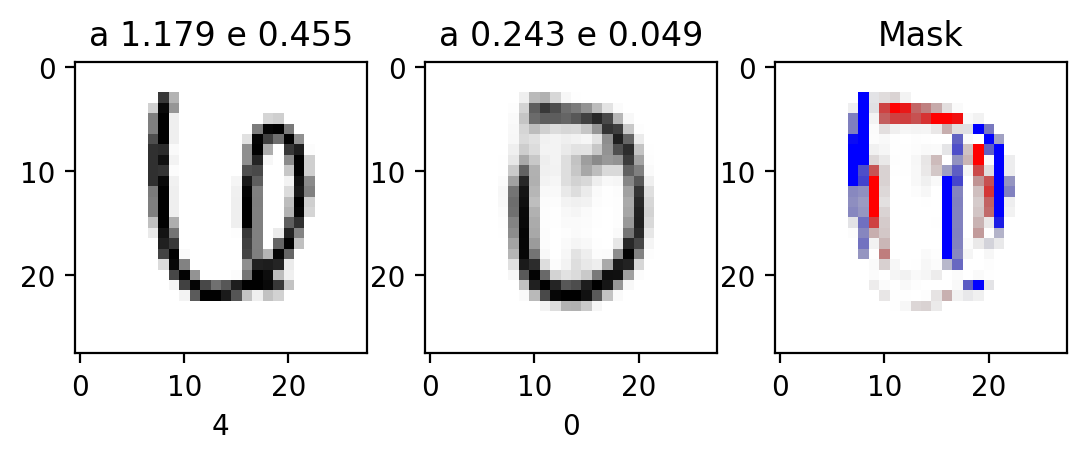

prob_out.requires_grad:  False
original aleatoric: 1.241 epistemic 0.381
Original prediction: class 3 with probability 0.358


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.362 epistemic 0.087
Modified prediction: class 8 with probability 0.908
24


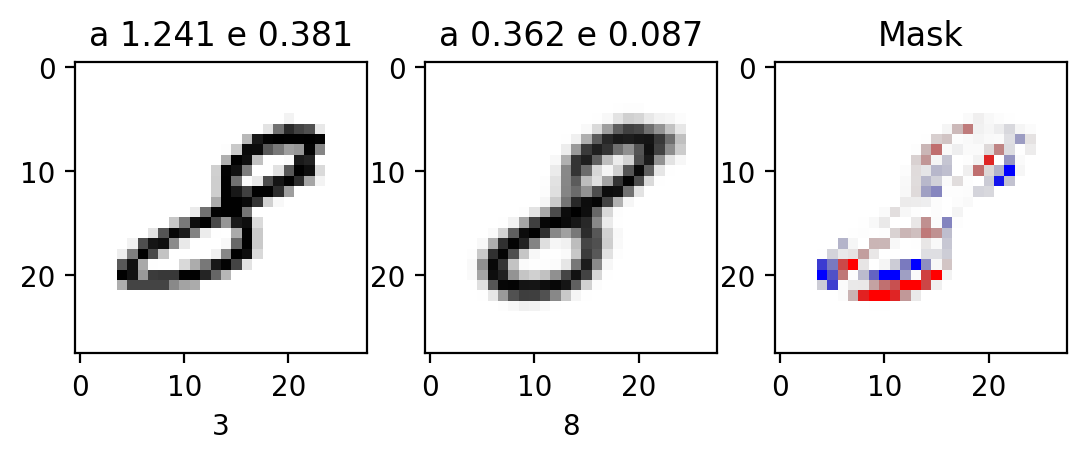

prob_out.requires_grad:  False
original aleatoric: 1.102 epistemic 0.518
Original prediction: class 5 with probability 0.442


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.909 epistemic 0.368
Modified prediction: class 5 with probability 0.533
25


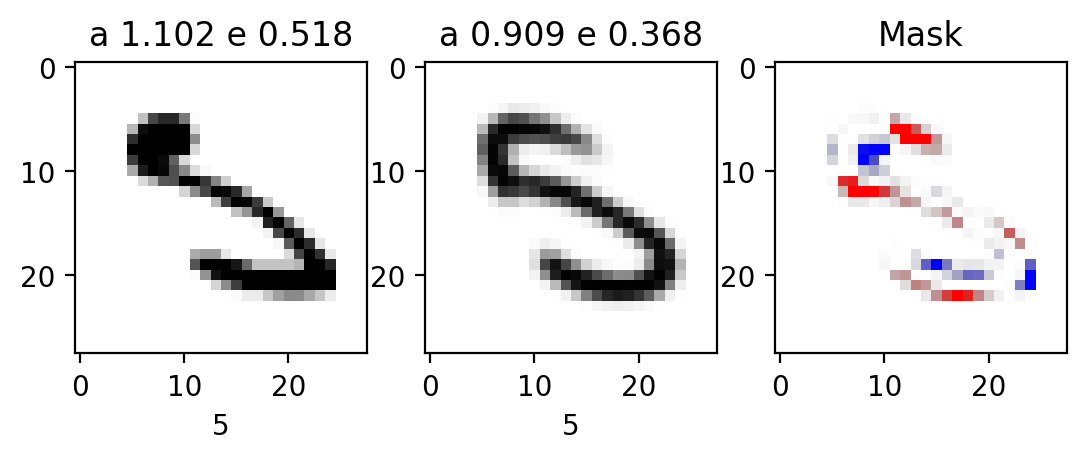

prob_out.requires_grad:  False
original aleatoric: 1.252 epistemic 0.368
Original prediction: class 8 with probability 0.468


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.608 epistemic 0.149
Modified prediction: class 0 with probability 0.803
26


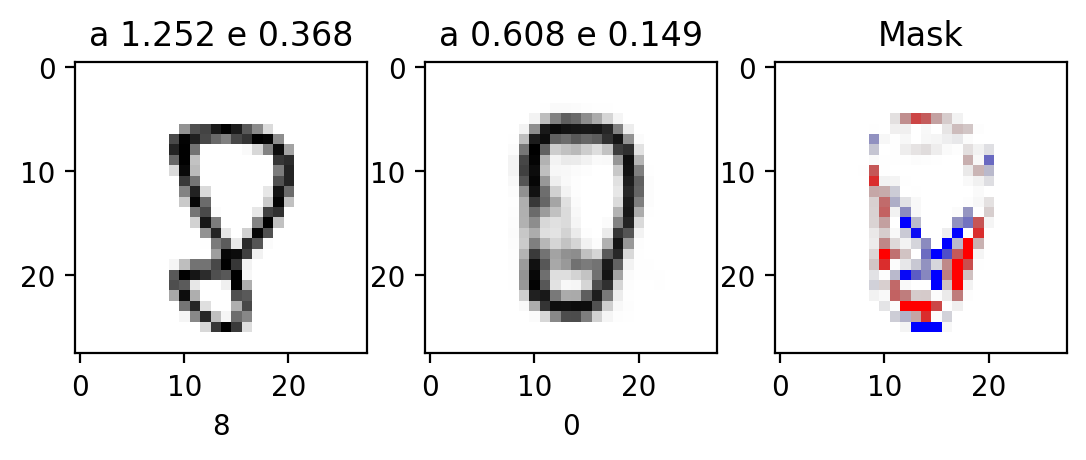

prob_out.requires_grad:  False
original aleatoric: 1.125 epistemic 0.482
Original prediction: class 2 with probability 0.364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.157 epistemic 0.044
Modified prediction: class 2 with probability 0.963
27


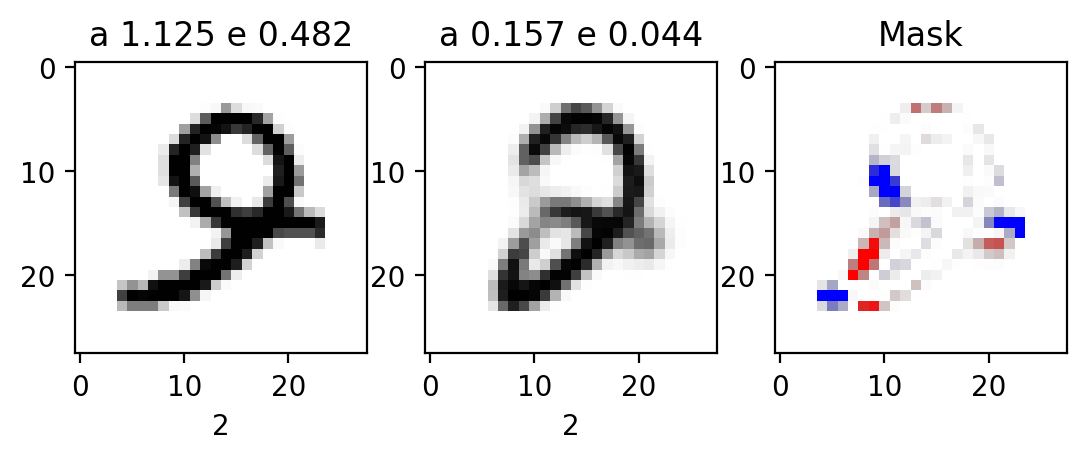

prob_out.requires_grad:  False
original aleatoric: 1.184 epistemic 0.424
Original prediction: class 9 with probability 0.330


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.192 epistemic 0.060
Modified prediction: class 0 with probability 0.956
28


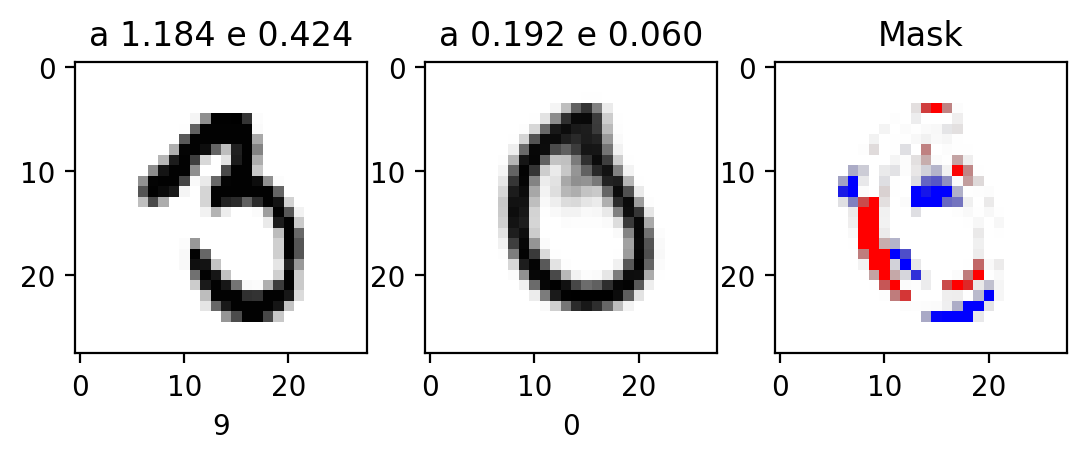

prob_out.requires_grad:  False
original aleatoric: 1.278 epistemic 0.327
Original prediction: class 0 with probability 0.394


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.346 epistemic 0.060
Modified prediction: class 0 with probability 0.920
29


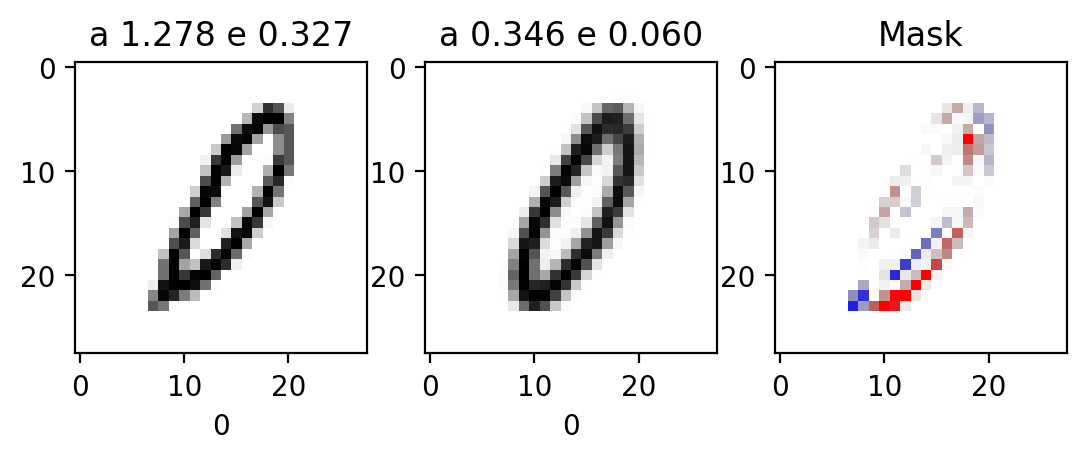

prob_out.requires_grad:  False
original aleatoric: 1.027 epistemic 0.578
Original prediction: class 9 with probability 0.364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.141 epistemic 0.048
Modified prediction: class 0 with probability 0.968
30


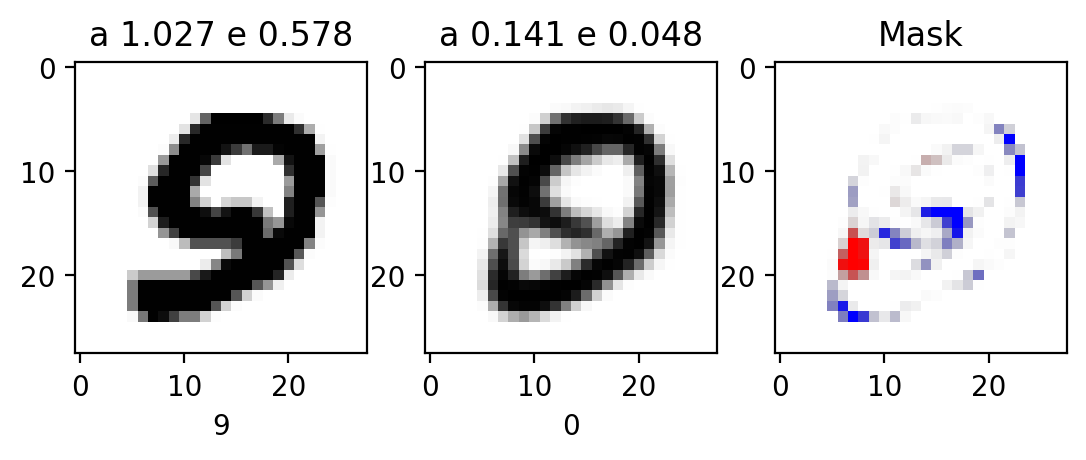

prob_out.requires_grad:  False
original aleatoric: 1.247 epistemic 0.357
Original prediction: class 9 with probability 0.425


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.659 epistemic 0.185
Modified prediction: class 9 with probability 0.782
31


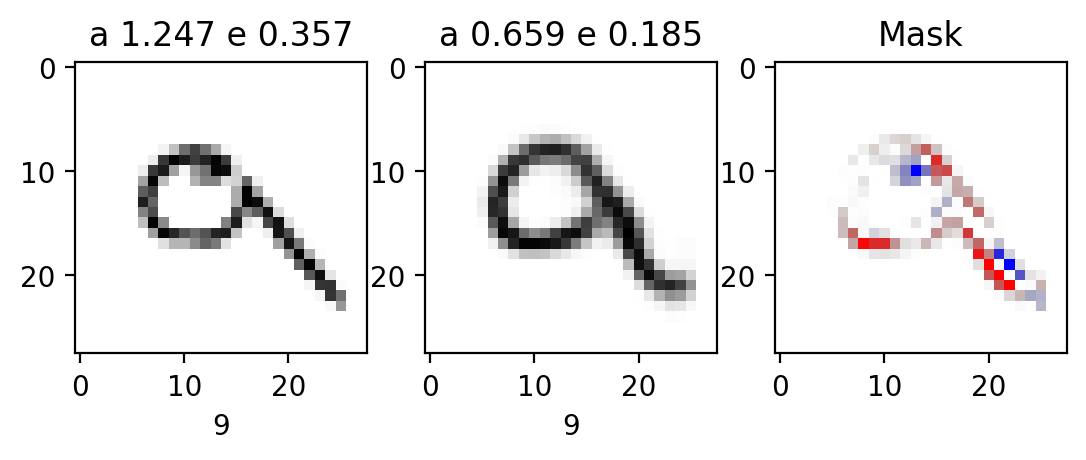

prob_out.requires_grad:  False
original aleatoric: 1.259 epistemic 0.341
Original prediction: class 8 with probability 0.465


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.204 epistemic 0.036
Modified prediction: class 8 with probability 0.959
32


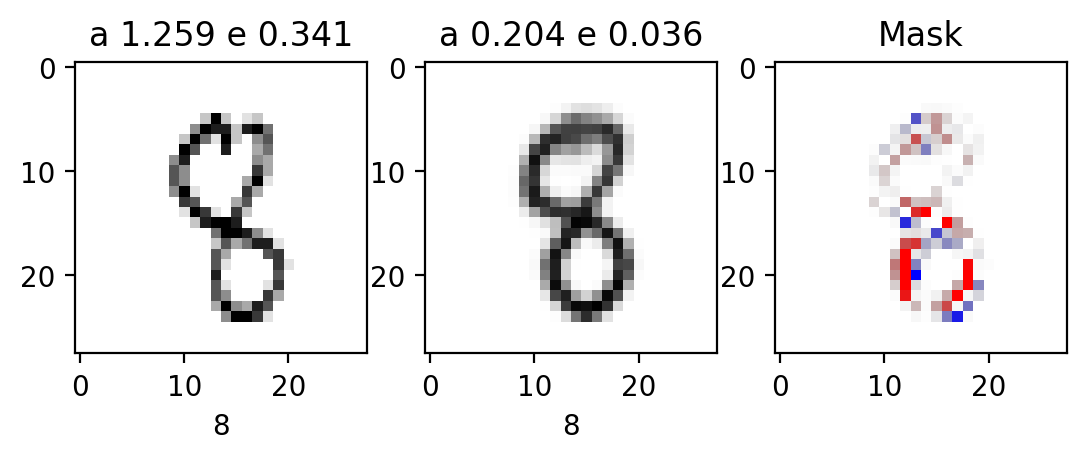

prob_out.requires_grad:  False
original aleatoric: 1.134 epistemic 0.463
Original prediction: class 3 with probability 0.318


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.216 epistemic 0.049
Modified prediction: class 0 with probability 0.954
33


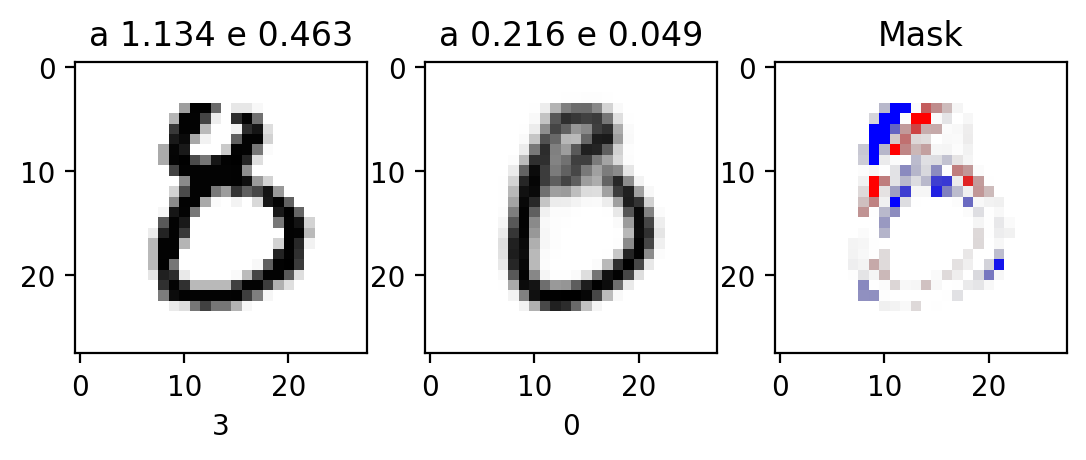

prob_out.requires_grad:  False
original aleatoric: 1.149 epistemic 0.447
Original prediction: class 3 with probability 0.375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.262 epistemic 0.085
Modified prediction: class 3 with probability 0.916
34


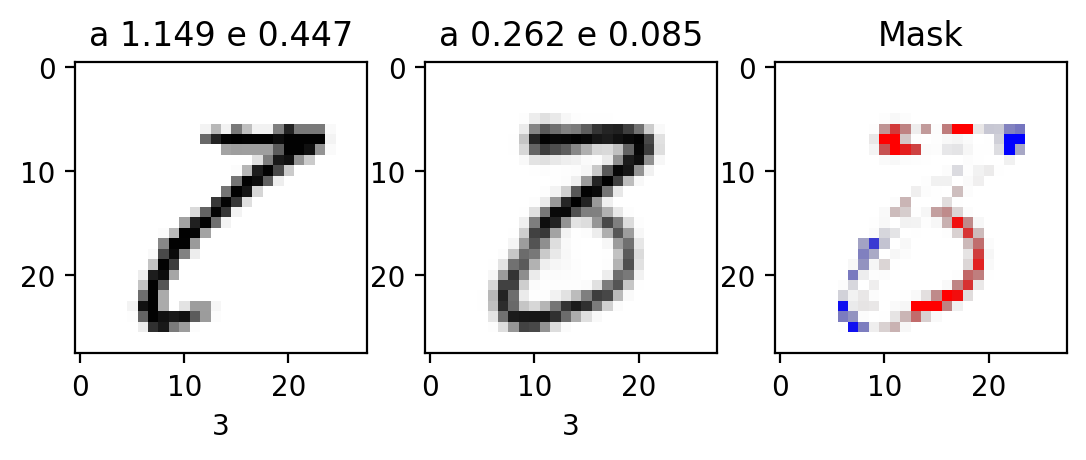

prob_out.requires_grad:  False
original aleatoric: 1.227 epistemic 0.367
Original prediction: class 5 with probability 0.391


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.242 epistemic 0.060
Modified prediction: class 5 with probability 0.941
35


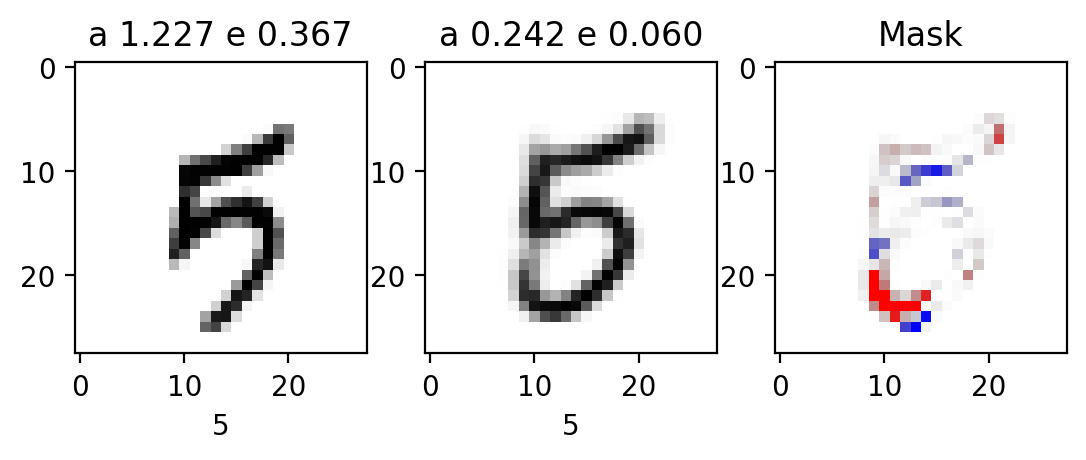

prob_out.requires_grad:  False
original aleatoric: 1.170 epistemic 0.423
Original prediction: class 3 with probability 0.479


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.187 epistemic 0.051
Modified prediction: class 3 with probability 0.959
36


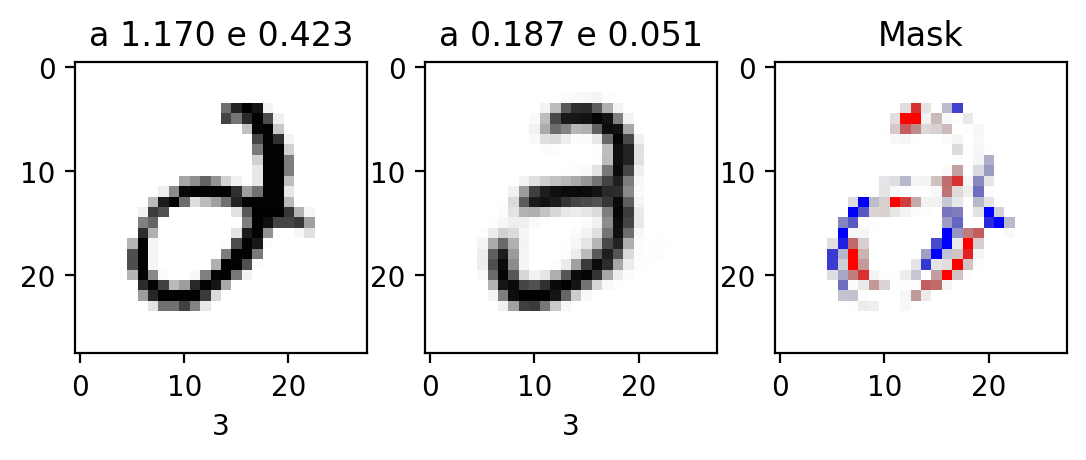

prob_out.requires_grad:  False
original aleatoric: 1.192 epistemic 0.400
Original prediction: class 4 with probability 0.374


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.460 epistemic 0.128
Modified prediction: class 9 with probability 0.829
37


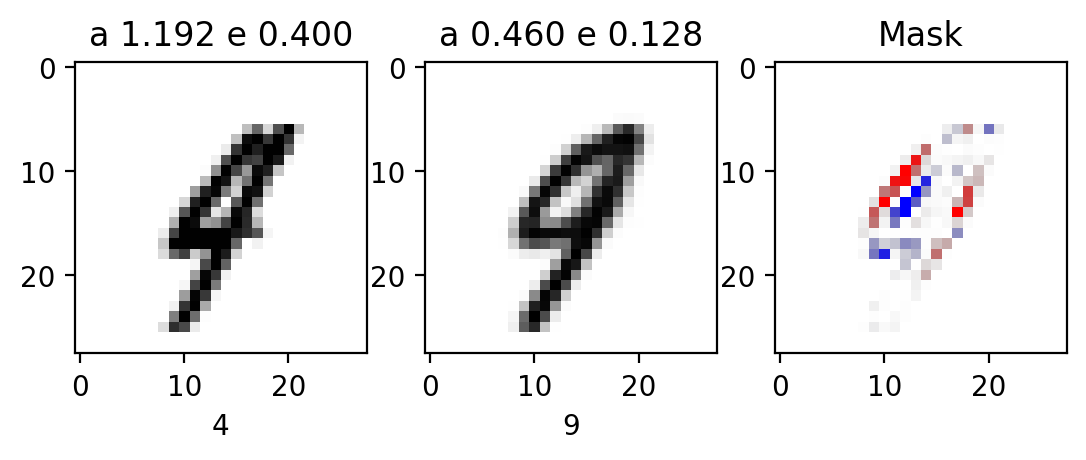

prob_out.requires_grad:  False
original aleatoric: 1.198 epistemic 0.393
Original prediction: class 2 with probability 0.440


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.549 epistemic 0.122
Modified prediction: class 8 with probability 0.850
38


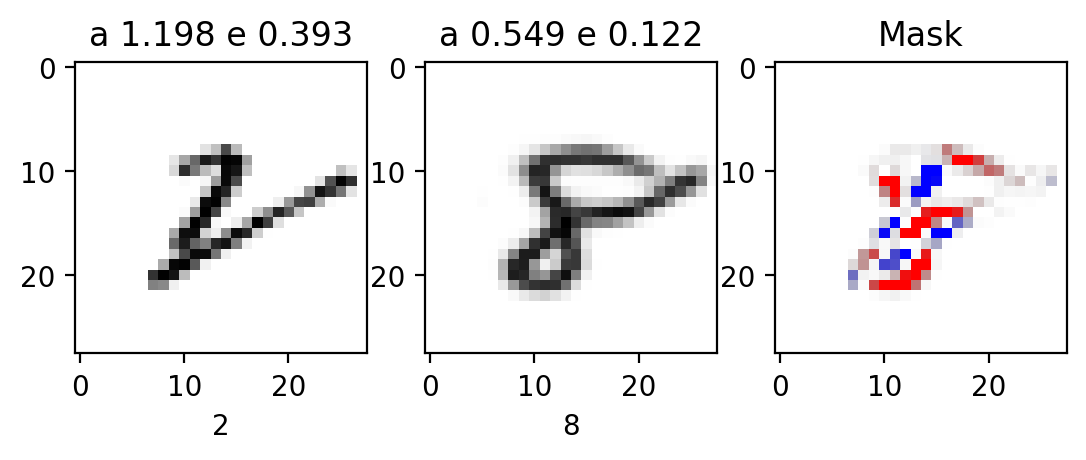

prob_out.requires_grad:  False
original aleatoric: 1.207 epistemic 0.378
Original prediction: class 2 with probability 0.289


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prob_out.requires_grad:  False
explanation aleatoric: 0.192 epistemic 0.037
Modified prediction: class 1 with probability 0.959
39


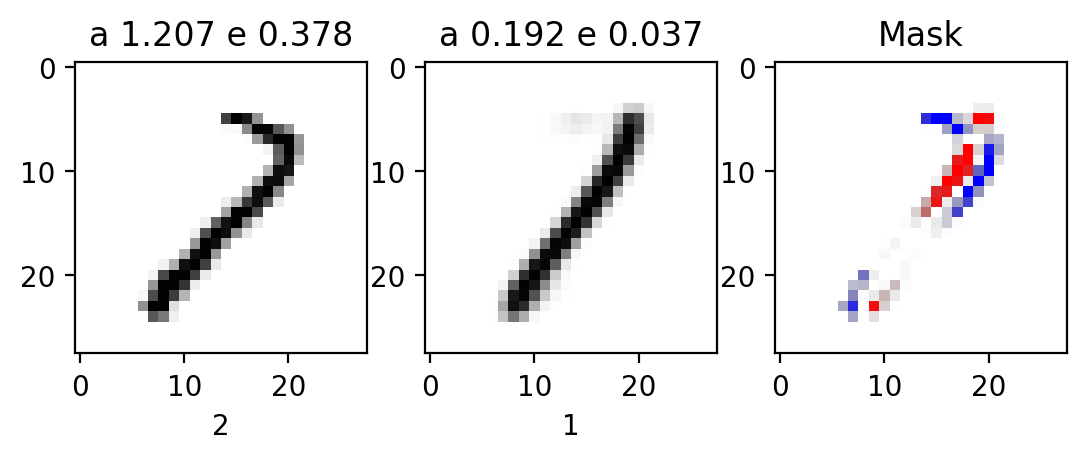

In [69]:

from src.probability import decompose_entropy_cat
from src.utils import MNIST_mean_std_norm


o_uncert_tosave = []
o_class_tosave = []
post_uncert_tosave = []
post_class_tosave = []
x_start_tosave = []
x_end_tosave = []


for N_explain in range(Nbatch):
    # Get predictions for original image
    to_BNN = MNIST_mean_std_norm(torch.tensor(x_test[uncert_idxs_sorted[N_explain],0,:,:]).view(1,-1)).to(BNN.device)
    probs = BNN.sample_predict(to_BNN, Nsamples=0, grad=False)
    o_total_entropy, o_aleatoric_entropy, o_epistemic_entropy = decompose_entropy_cat(probs)
    print('original aleatoric: %2.3f epistemic %2.3f' % (o_aleatoric_entropy.item(), o_epistemic_entropy.item()))
    
    # Get predicted class probabilities and indices
    mean_probs = probs.mean(dim=0)
    values, indices = mean_probs.sort(dim=1, descending=True)
    pred_class = indices[0, 0].item()  # Get most likely class
    pred_prob = values[0, 0].item()    # Get probability of most likely class
    print(f'Original prediction: class {pred_class} with probability {pred_prob:.3f}')

    # Plot original image
    fig, ax = plt.subplots(nrows=1, ncols=3, dpi=200)
    ax[0].imshow(1-x_test[uncert_idxs_sorted[N_explain],0,:,:], cmap='gray')
    ax[0].set_title('a %2.3f e %2.3f' % (o_aleatoric_entropy.item(), o_epistemic_entropy.item()))
    ax[0].set_xlabel(str(pred_class))

    # Get predictions for modified image
    to_BNN = MNIST_mean_std_norm(torch.tensor(x_vec[-1,N_explain,0,:,:]).view(1,-1)).to(BNN.device)
    probs = BNN.sample_predict(to_BNN, Nsamples=0, grad=False)
    total_entropy, aleatoric_entropy, epistemic_entropy = decompose_entropy_cat(probs)
    print('explanation aleatoric: %2.3f epistemic %2.3f' % (aleatoric_entropy.item(), epistemic_entropy.item()))
    
    # Get predicted class probabilities and indices for modified image
    mean_probs = probs.mean(dim=0)
    values, indices = mean_probs.sort(dim=1, descending=True)
    pred_class_modified = indices[0, 0].item()  # Get most likely class
    pred_prob_modified = values[0, 0].item()    # Get probability of most likely class
    print(f'Modified prediction: class {pred_class_modified} with probability {pred_prob_modified:.3f}')

    # Plot modified image
    ax[1].imshow(1-x_vec[-1,N_explain,0,:,:], cmap='gray')
    ax[1].set_title('a %2.3f e %2.3f' % (aleatoric_entropy.item(), epistemic_entropy.item()))
    ax[1].set_xlabel(str(pred_class_modified))

    # Create and plot mask
    mask = x_vec[-1] - x_init_batch

    mask_neg = -mask[N_explain,0,:,:]
    mask_neg[mask_neg < 1e-3] = 0
    mask_neg = (mask_neg**2)
    mask_neg = np.repeat(np.expand_dims(mask_neg, axis=2), 4, axis=2)*2
    mask_neg[:,:,0:2] = 0

    mask_pos = mask[N_explain,0,:,:]
    mask_pos[mask_pos < 1e-3] = 0
    mask_pos = mask_pos**2
    mask_pos = np.repeat(np.expand_dims(mask_pos, axis=2), 4, axis=2)*2
    mask_pos[:,:,1:3] = 0

    ax[2].imshow(mask_pos, alpha=1)
    ax[2].imshow(mask_neg, alpha=1)
    ax[2].set_title('Mask')

    print(N_explain)
    plt.show()

    # Save results
    o_uncert_tosave.append(o_total_entropy.data.cpu().numpy())
    o_class_tosave.append(pred_class)
    post_uncert_tosave.append(total_entropy.data.cpu().numpy())
    post_class_tosave.append(pred_class_modified)
    x_start_tosave.append(x_test[uncert_idxs_sorted[N_explain],0,:,:])
    x_end_tosave.append(x_vec[-1,N_explain,0,:,:])

# Stack saved results
o_uncert_tosave = np.stack(o_uncert_tosave, axis=0)
o_class_tosave = np.stack(o_class_tosave, axis=0)
post_uncert_tosave = np.stack(post_uncert_tosave, axis=0)
post_class_tosave = np.stack(post_class_tosave, axis=0)
x_start_tosave = np.stack(x_start_tosave, axis=0)
x_end_tosave = np.stack(x_end_tosave, axis=0)


In [ ]:
plt.figure(figsize=(10,6))
plt.hist(o_uncert_tosave, bins=30, alpha=0.7, label='Original Uncertainties')
plt.xlabel('Uncertainty Value')
plt.ylabel('Count')
plt.title('Distribution of Original Prediction Uncertainties')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,6))
plt.hist(post_uncert_tosave, bins=30, alpha=0.7, label='Post-CLUE Uncertainties')
plt.xlabel('Uncertainty Value')
plt.ylabel('Count')
plt.title('Distribution of Post-CLUE Prediction Uncertainties')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [38]:
def visualize_latent_trajectory(VAE, z_vec, sample_idx=0, num_steps=None, figsize=(15,6)):
    """
    Visualize the trajectory of latent points for a single sample.

    Args:
        VAE: The trained VAE model
        z_vec: Trajectory of latent vectors (steps × batch_size × latent_dim)
        sample_idx: Which sample to visualize (default=0)
        num_steps: Number of steps to visualize (default=None, shows all)
        figsize: Size of the figure (default=(15,6))
    """
    # Get trajectory for specific sample
    z_trajectory = z_vec[:, sample_idx, :]
    total_steps = len(z_trajectory)

    # If num_steps specified, select evenly spaced steps
    if num_steps is not None:
        indices = np.linspace(0, total_steps-1, num_steps, dtype=int)
        z_trajectory = z_trajectory[indices]

    # Convert to tensor if necessary
    if isinstance(z_trajectory, np.ndarray):
        z_trajectory = torch.from_numpy(z_trajectory).float()

    # Calculate grid dimensions
    num_points = len(z_trajectory)
    num_rows = (num_points - 1) // 5 + 1  # 5 images per row
    num_cols = min(5, num_points)  # Maximum of 5 columns

    # Generate images from the latent vectors
    with torch.no_grad():
        x_rec = VAE.model.decode(z_trajectory.to(VAE.device))
        x_rec = torch.sigmoid(x_rec)

    # Plot the generated images
    plt.figure(figsize=figsize)
    for i in range(num_points):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(x_rec[i].detach().cpu().reshape(28,28), cmap='gray')
        plt.axis('off')
        if num_steps is not None:
            step_num = indices[i]
        else:
            step_num = i
        plt.title(f'Step {step_num}\n{"Initial" if step_num == 0 else "Final" if step_num == total_steps-1 else ""}')

    plt.suptitle(f'Latent Space Trajectory for Sample {sample_idx}')
    plt.tight_layout()
    plt.show()

# Example usage:
# Show all steps:
# visualize_latent_trajectory(VAE, z_vec, sample_idx=0)

# Or show specific number of evenly-spaced steps:
# visualize_latent_trajectory(VAE, z_vec, sample_idx=0, num_steps=10)

In [ ]:
visualize_latent_trajectory(VAE, z_vec, sample_idx=23, num_steps = 10)

In [46]:
def visualize_trajectory_with_original(VAE, z_vec, x_vec, sample_idx=0, num_steps=None, figsize=(15,8)):
    """
    Visualize the trajectory with the original input image.
    """
    plt.figure(figsize=figsize)

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(x_vec[sample_idx].reshape(28,28), cmap='gray')
    plt.title('Original Input')
    plt.axis('off')

    # Plot trajectory
    plt.subplot(2, 1, 2)
    visualize_latent_trajectory(VAE, z_vec, sample_idx, num_steps)
    plt.show()

# Example usage:
# visualize_trajectory_with_original(VAE, z_vec, original_x, sample_idx=0, num_steps=10)

In [47]:
def visualize_x_trajectory(CLUE_explainer, x_vec, sample_idx=0, num_steps=None, figsize=(15,8)):
    """
    Visualize the image trajectory with the original input image.

    Args:
        CLUE_explainer: The CLUE model instance containing original_x
        x_vec: Trajectory of images (steps × batch_size × image_dimensions)
        sample_idx: Which sample to visualize (default=0)
        num_steps: Number of steps to visualize (default=None, shows all)
        figsize: Size of the figure (default=(15,8))
    """
    # Get the original input from CLUE model
    original_x = CLUE_explainer.original_x.cpu().numpy()

    # Get trajectory for specific sample
    x_trajectory = x_vec[:, sample_idx]
    total_steps = len(x_trajectory)

    # If num_steps specified, select evenly spaced steps
    if num_steps is not None:
        indices = np.linspace(0, total_steps-1, num_steps, dtype=int)
        x_trajectory = x_trajectory[indices]
    else:
        indices = range(total_steps)

    # Calculate grid dimensions for trajectory
    num_points = len(x_trajectory)
    num_rows = (num_points - 1) // 5 + 1  # 5 images per row
    num_cols = min(5, num_points)  # Maximum of 5 columns

    plt.figure(figsize=figsize)

    # Plot original image
    plt.subplot(num_rows + 1, num_cols, 1)
    plt.imshow(original_x[sample_idx].reshape(28,28), cmap='gray')
    plt.title('Original Input')
    plt.axis('off')

    # Plot trajectory
    for i in range(num_points):
        plt.subplot(num_rows + 1, num_cols, num_cols + i + 1)
        plt.imshow(x_trajectory[i].reshape(28,28), cmap='gray')
        plt.axis('off')
        step_num = indices[i]
        plt.title(f'Step {step_num}\n{"Initial" if step_num == 0 else "Final" if step_num == total_steps-1 else ""}')

    plt.suptitle(f'Image Trajectory for Sample {sample_idx}')
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_x_trajectory(CLUE_explainer, x_vec, sample_idx=0, num_steps=10)

In [ ]:
visualize_x_trajectory(CLUE_explainer, x_vec, sample_idx=1, num_steps=10)

In [ ]:
# /Users/conor/Documents/College terms/College/Thesis/Thesis_Code_Minimised/my-experiments/test-CLUE.ipynb

import importlib
import interpret.CLUE
importlib.reload(interpret.CLUE)
from interpret.CLUE import CLUE
from src.utils import Ln_distance
import torch
import matplotlib.pyplot as plt
import numpy as np

# Ensure the device is correctly set
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Clear CUDA cache if using CUDA
if device.type == 'cuda':
    torch.cuda.empty_cache()

# Define distance metric
dist = Ln_distance(n=1, dim=(1))
x_dim = x_init_batch.reshape(x_init_batch.shape[0], -1).shape[1]
distance_weight = 25 / x_dim

# Step 1: Test VAE Reconstruction Quality
def test_vae_reconstruction(VAE, original_x, sample_idx=0):
    """Test VAE reconstruction quality."""
    VAE.model.eval()

    # Convert original_x to a PyTorch tensor if it's a NumPy array
    if isinstance(original_x, np.ndarray):
        original_x = torch.from_numpy(original_x).float()

    with torch.no_grad():
        # Encode
        approx_post = VAE.model.encode(original_x.to(device))
        if hasattr(approx_post, 'loc'):
            z = approx_post.loc  # For models returning distributions
        else:
            z = approx_post  # For deterministic encoders

        # Decode
        x_rec = VAE.model.decode(z)
        x_rec = torch.sigmoid(x_rec)  # Assuming Bernoulli VAE

    # Visualize original and reconstruction
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    plt.imshow(original_x[sample_idx].cpu().reshape(28,28), cmap='gray')
    plt.title('Original Input')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(x_rec[sample_idx].cpu().reshape(28,28), cmap='gray')
    plt.title('VAE Reconstruction')
    plt.axis('off')

    plt.suptitle('VAE Reconstruction Quality')
    plt.tight_layout()
    plt.show()

    return z.cpu().numpy()

# Run the VAE reconstruction test
z_init_from_vae = test_vae_reconstruction(VAE, x_init_batch, sample_idx=0)
# Run the VAE reconstruction test
z_init_from_vae = test_vae_reconstruction(VAE, x_init_batch, sample_idx=0)

# Step 2: Initialize CLUE with the Correct Latent Representation
CLUE_explainer = CLUE(
    VAE=VAE,
    BNN=BNN,
    original_x=x_init_batch,
    uncertainty_weight=1,
    aleatoric_weight=0,
    epistemic_weight=0,
    prior_weight=0,
    distance_weight=distance_weight,
    latent_L2_weight=0,
    prediction_similarity_weight=0,
    lr=0.5,  # Adjusted learning rate for better optimization progress
    cond_mask=None,
    distance_metric=dist,
    z_init=z_init_from_vae,  # Use the encoded latent representation
    norm_MNIST=True,
    flatten_BNN=True,
    regression=False,
    prob_BNN=True,
    cuda=(device.type == 'cuda')
)

# Move CLUE's internal tensors to the correct device
CLUE_explainer.to(device)

# Step 3: Verify Initial Reconstructions Match Original Inputs
def verify_initial_reconstruction(CLUE_explainer, VAE, x_vec, sample_idx=0):
    """Verify that the initial step matches the original input."""
    initial_rec = x_vec[0, sample_idx].reshape(28, 28)
    original = CLUE_explainer.original_x[sample_idx].cpu().reshape(28, 28)

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Input')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(initial_rec, cmap='gray')
    plt.title('Initial Reconstruction')
    plt.axis('off')

    plt.suptitle('Initial Reconstruction Verification')
    plt.tight_layout()
    plt.show()

# Run CLUE optimization with anomaly detection and monitoring
torch.autograd.set_detect_anomaly(True)  # Enable anomaly detection for debugging

def run_clue_with_diagnostics(CLUE_explainer, min_steps=3, max_steps=50, n_early_stop=20):
         """Run CLUE optimization with detailed diagnostics."""
         # Initialize lists to store trajectories
         z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, cost_vec, dist_vec = \
             CLUE_explainer.optimise(min_steps=min_steps, max_steps=max_steps, n_early_stop=n_early_stop)

         # Convert to numpy for easier handling
         z_vec_np = np.array(z_vec)
         x_vec_np = np.array(x_vec)
         uncertainty_vec_np = np.array(uncertainty_vec)
         epistemic_vec_np = np.array(epistemic_vec)
         aleatoric_vec_np = np.array(aleatoric_vec)
         cost_vec_np = np.array(cost_vec)
         dist_vec_np = np.array(dist_vec)

         # Plot optimization metrics
         fig, axes = plt.subplots(1, 3, figsize=(18,5))

         axes[0].plot(cost_vec_np.mean(axis=1), label='Mean Cost')
         axes[0].set_title('Mean Cost Over Iterations')
         axes[0].set_xlabel('Iterations')
         axes[0].set_ylabel('Cost')
         axes[0].legend()

         axes[1].plot(uncertainty_vec_np.mean(axis=1), label='Total Entropy')
         axes[1].set_title('Total Entropy Over Iterations')
         axes[1].set_xlabel('Iterations')
         axes[1].set_ylabel('Uncertainty')
         axes[1].legend()

         axes[2].plot(dist_vec_np.mean(axis=1), label='Distance Penalty', color='green')
         axes[2].set_title('Distance Penalty Over Iterations')
         axes[2].set_xlabel('Iterations')
         axes[2].set_ylabel('Distance')
         axes[2].legend()

         plt.tight_layout()
         plt.show()

         # Verify initial reconstruction
         verify_initial_reconstruction(CLUE_explainer, VAE, x_vec_np, sample_idx=0)

         # Visualize trajectory for the first sample
         visualize_x_trajectory(x_vec_np, CLUE_explainer.original_x, sample_idx=0, num_steps=20)

         return z_vec_np, x_vec_np, uncertainty_vec_np, epistemic_vec_np, aleatoric_vec_np, cost_vec_np, dist_vec_np

def visualize_x_trajectory(x_vec, original_x, sample_idx=0, num_steps=20, figsize=(15,8)):
  """
  Visualize the image trajectory with the original input image.

  Args:
      x_vec: Trajectory of images (steps × batch_size × image_dimensions)
      original_x: Original input images
      sample_idx: Which sample to visualize (default=0)
      num_steps: Number of steps to visualize (default=20)
      figsize: Size of the figure (default=(15,8))
  """
  # Get trajectory for specific sample
  x_trajectory = x_vec[:, sample_idx]
  total_steps = len(x_trajectory)

  # If num_steps specified and less than total_steps, select evenly spaced steps
  if num_steps is not None and total_steps > num_steps:
      indices = np.linspace(0, total_steps-1, num_steps, dtype=int)
      x_trajectory = x_trajectory[indices]
  else:
      indices = range(total_steps)

  # Calculate grid dimensions for trajectory
  num_points = len(x_trajectory) + 1  # +1 for original image
  num_cols = 5
  num_rows = (num_points + num_cols - 1) // num_cols  # Ceiling division to ensure enough rows

  plt.figure(figsize=figsize)

  # Plot original image
  plt.subplot(num_rows, num_cols, 1)
  plt.imshow(original_x[sample_idx].cpu().reshape(28,28), cmap='gray')
  plt.title('Original Input')
  plt.axis('off')

  # Plot trajectory
  for i in range(len(x_trajectory)):
      plt.subplot(num_rows, num_cols, i+2)  # +2 to account for original image
      plt.imshow(x_trajectory[i].reshape(28,28), cmap='gray')
      plt.axis('off')
      step_num = indices[i]
      if step_num == 0:
          plt.title(f'Step {step_num}\nInitial')
      elif step_num == total_steps-1:
          plt.title(f'Step {step_num}\nFinal')
      else:
          plt.title(f'Step {step_num}')

  plt.suptitle(f'Image Trajectory for Sample {sample_idx}')
  plt.tight_layout()
  plt.show()

# Example usage:
# visualize_x_trajectory(x_vec_np, CLUE_explainer.original_x, sample_idx=0, num_steps=20)

# Step 4: Execute Optimization with Diagnostics
z_vec, x_vec, uncertainty_vec, epistemic_vec, aleatoric_vec, cost_vec, dist_vec = \
    run_clue_with_diagnostics(CLUE_explainer)

In [ ]:
visualize_x_trajectory(x_vec, CLUE_explainer.original_x, sample_idx=10, num_steps=20)